<a href="https://colab.research.google.com/github/jesh91/jesh91/blob/main/Assigment_2_Data_Analytics_and_Machine_Learning_Assignment_Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics and Machine Learning Assignment: Real Estate Price Prediction



The purpose of this project is Web Scraping and hence the extraction of property information from the website. I want to know the prices of houses for sale in Kuala Lumpur, Malaysia, as per iProperty. The variables of interest are descriptive statistics, that is, how properties differ from one neighborhood to another. I will also try to construct the prices predicting model, though it will be hardly useful because the number of features I scrape is relatively small.




```
# This is formatted as code
```

# Import

In [ ]:
import numpy as np
np.random.seed(101)
import requests
import time
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
import sklearn.metrics
import keras.models
import keras.layers

Using TensorFlow backend.

# Data Collection


The raw data that I collected needs to be preprocessed and the columns cleaned.



In [ ]:
properties = pd.read_csv("real_estate.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

# After uploading, load the CSV file
properties = pd.read_csv("real_estate.csv")

Saving real_estate.csv to real_estate (1).csv


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
properties.head()

Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        NaN   
4        Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished

from matplotlib import pyplot as plt
_df_0['Bathrooms'].plot(kind='hist', bins=20, title='Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Car Parks'].plot(kind='hist', bins=20, title='Car Parks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Rooms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Property Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Bathrooms', y='Car Parks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Bathrooms'].plot(kind='line', figsize=(8, 4), title='Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Car Parks'].plot(kind='line', figsize=(8, 4), title='Car Parks')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Price'].value_counts()
    for x_label, grp in _df_9.groupby('Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Rooms'].value_counts()
    for x_label, grp in _df_10.groupby('Price')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Price')
_ = plt.ylabel('Rooms')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Property Type'].value_counts()
    for x_label, grp in _df_11.groupby('Rooms')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Rooms')
_ = plt.ylabel('Property Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Size'].value_counts()
    for x_label, grp in _df_12.groupby('Property Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Property Type')
_ = plt.ylabel('Size')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Bathrooms', y='Location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Price'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Bathrooms', y='Price', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Rooms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Bathrooms', y='Rooms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Property Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Bathrooms', y='Property Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Price

As a first step, I'll remove all entries with missing prices as the price will be one of the target features to predict down the road. Next, I want to make sure that every remaining entries matches the same format of "RM" followed by commas and digits. There are 0 entries in the wrong format.




In [ ]:
properties = properties.loc[~properties["Price"].isna()]

In [ ]:
import numpy as np  # Ensure NumPy is imported

# Use .loc[] to avoid SettingWithCopyWarning
properties.loc[:, "Price"] = properties["Price"].astype(str).fillna("")

# Use regex to find incorrect formats
incorrect_entries = np.sum(~properties["Price"].str.match(r"^RM [0-9,]+$"))

print("There are {} entries in the wrong format.".format(incorrect_entries))

There are 0 entries in the wrong format.


In [ ]:
# Strip the price of the "RM" as well as commas
def strip_price(text):
    text = text.replace("RM", "")
    text = text.replace(",", "")
    text = text.strip()
    return int(text)

properties["Price"] = properties["Price"].apply(strip_price)

<ipython-input-12-8aa43d13e3eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties["Price"] = properties["Price"].apply(strip_price)


# Location

A common issue is capitalization, so let's make everything lower case. Additionally, let's remove the city name as I explicitly only scraped entries from Kuala Lumpur.
A look at the unique location values shows that they are reasonably standardized.




In [ ]:
properties.loc[:, "Location"] = properties["Location"].str.lower()
properties.loc[:, "Location"] = properties["Location"].str.replace(r", kuala lumpur$", "", regex=True)

In [ ]:
sorted(properties["Location"].unique())

['adiva desa parkcity',
 'alam damai',
 'ampang',
 'ampang hilir',
 'bandar damai perdana',
 'bandar menjalara',
 'bandar sri damansara',
 'bandar tasik selatan',
 'bangsar',
 'bangsar south',
 'batu caves',
 'brickfields',
 'bukit  persekutuan',
 'bukit bintang',
 'bukit damansara',
 'bukit jalil',
 'bukit kiara',
 'bukit ledang',
 'bukit tunku (kenny hills)',
 'canary residence',
 'casa rimba',
 'chan sow lin',
 'cheras',
 'city centre',
 'country heights damansara',
 'cyberjaya',
 'damansara',
 'damansara heights',
 'desa pandan',
 'desa parkcity',
 'desa petaling',
 'duta nusantara',
 'dutamas',
 'federal hill',
 'gombak',
 'gurney',
 'happy garden',
 'jalan ipoh',
 'jalan klang lama (old klang road)',
 'jalan kuching',
 'jalan sultan ismail',
 'jalan u-thant',
 'jinjang',
 'kemensah',
 'kepong',
 'keramat',
 'kl city',
 'kl eco city',
 'kl sentral',
 'klcc',
 'kota damansara',
 'kuala lumpur',
 'kuchai lama',
 'landed sd',
 'mid valley city',
 'mont kiara',
 'off gasing indah,',
 

A bigger issue are regions with very few properties posted. The frequency distribution, plotted logarithmically, looks as follows. A significant number of regions have very few properties listed, making them difficult to work with. I would need to have relative geographical locations of each neighborhood to properly clean the location data. As an initial step, I simply remove entries in locations with fewer than  100
  properties listed.


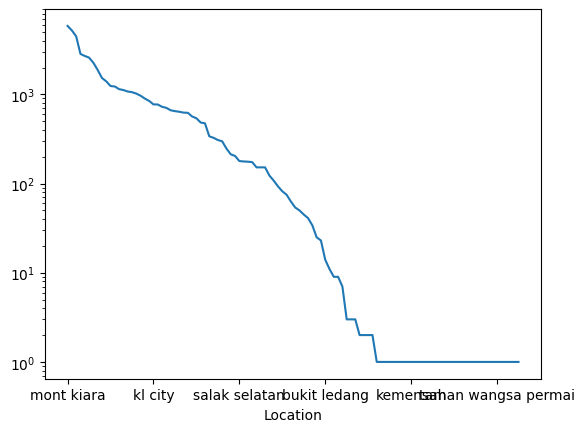

In [ ]:
properties["Location"].value_counts().plot(logy=True);

In [ ]:
significant_locations = properties["Location"].value_counts()[
    properties["Location"].value_counts() >= 100].index

properties = properties.loc[np.isin(properties["Location"], significant_locations)]

A new look at the locations shows that there are no more ambiguous names.


In [ ]:
sorted(properties["Location"].unique())


['ampang',
 'ampang hilir',
 'bandar damai perdana',
 'bandar menjalara',
 'bangsar',
 'bangsar south',
 'batu caves',
 'brickfields',
 'bukit bintang',
 'bukit jalil',
 'bukit tunku (kenny hills)',
 'cheras',
 'city centre',
 'country heights damansara',
 'damansara heights',
 'desa pandan',
 'desa parkcity',
 'desa petaling',
 'dutamas',
 'jalan ipoh',
 'jalan klang lama (old klang road)',
 'jalan kuching',
 'jalan sultan ismail',
 'kepong',
 'keramat',
 'kl city',
 'kl eco city',
 'kl sentral',
 'klcc',
 'kuchai lama',
 'mont kiara',
 'oug',
 'pandan perdana',
 'pantai',
 'salak selatan',
 'segambut',
 'sentul',
 'seputeh',
 'setapak',
 'setiawangsa',
 'sri hartamas',
 'sri petaling',
 'sungai besi',
 'sunway spk',
 'taman desa',
 'taman melawati',
 'taman tun dr ismail',
 'titiwangsa',
 'wangsa maju']

In [ ]:
print(df.columns)

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')


In [ ]:
print(condo_serviced.columns)

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')


In [ ]:
print(condo_serviced.head())



                     location         price rooms  bathrooms  car parks  \
0          KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
2       Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
4   Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0        2.0   
18   Mont Kiara, Kuala Lumpur  RM 1,780,000   4+1        4.0        2.0   
19   Mont Kiara, Kuala Lumpur  RM 3,450,000   4+1        6.0        3.0   

           property type                      size        furnishing  
0     Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
2   Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4   Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
18  Condominium (Corner)  Built-up : 1,830 sq. ft.  Partly Furnished  
19  Condominium (Corner)  Built-up : 3,720 sq. ft.   Fully Furnished  


<ipython-input-31-edd2ccfe102f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo_serviced['Price'] = condo_serviced['Price'].str.replace('RM', '').str.replace(',', '').astype(float)
<ipython-input-31-edd2ccfe102f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_area.values, y=avg_price_per_area.index, palette='viridis')


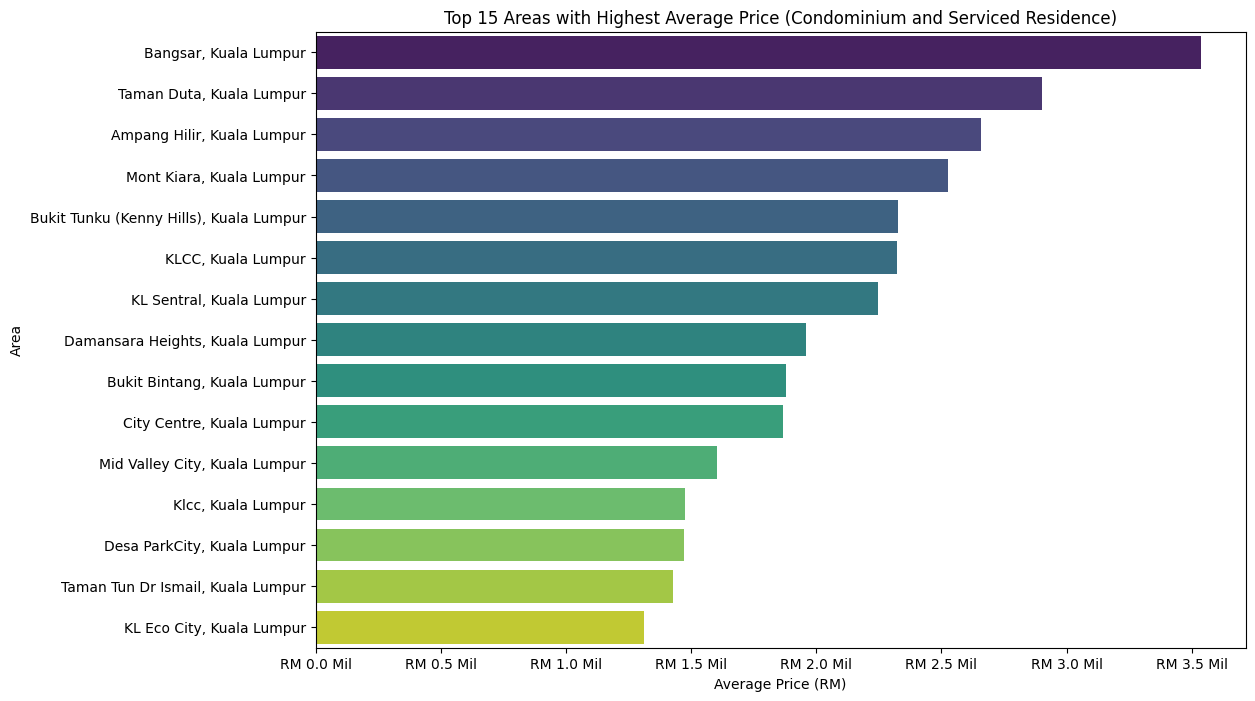

In [ ]:
# Filter data for Condominium and Serviced Residence
condo_serviced = df[df['Property Type'].isin(['Condominium (Corner)', 'Condominium (High-Rise)', 'Serviced Residence'])]

# Remove 'RM' and commas from 'Price' and convert to numeric
condo_serviced['Price'] = condo_serviced['Price'].str.replace('RM', '').str.replace(',', '').astype(float)

# Calculate average price per area
# Changed 'Area' to 'Location'
avg_price_per_area = condo_serviced.groupby('Location')['Price'].mean().sort_values(ascending=False).head(15)

# Plotting the top 15 areas by average price
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_per_area.values, y=avg_price_per_area.index, palette='viridis')

# Customize x-axis ticks to display in million (RM Mil)
#Import the FuncFormatter object from the matplotlib library
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f'RM {x / 10**6:.1f} Mil')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 15 Areas with Highest Average Price (Condominium and Serviced Residence)')
plt.xlabel('Average Price (RM)')
plt.ylabel('Area')
plt.show()

<ipython-input-33-7fbba5113065>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_area_low.values, y=avg_price_per_area_low.index, palette='viridis')


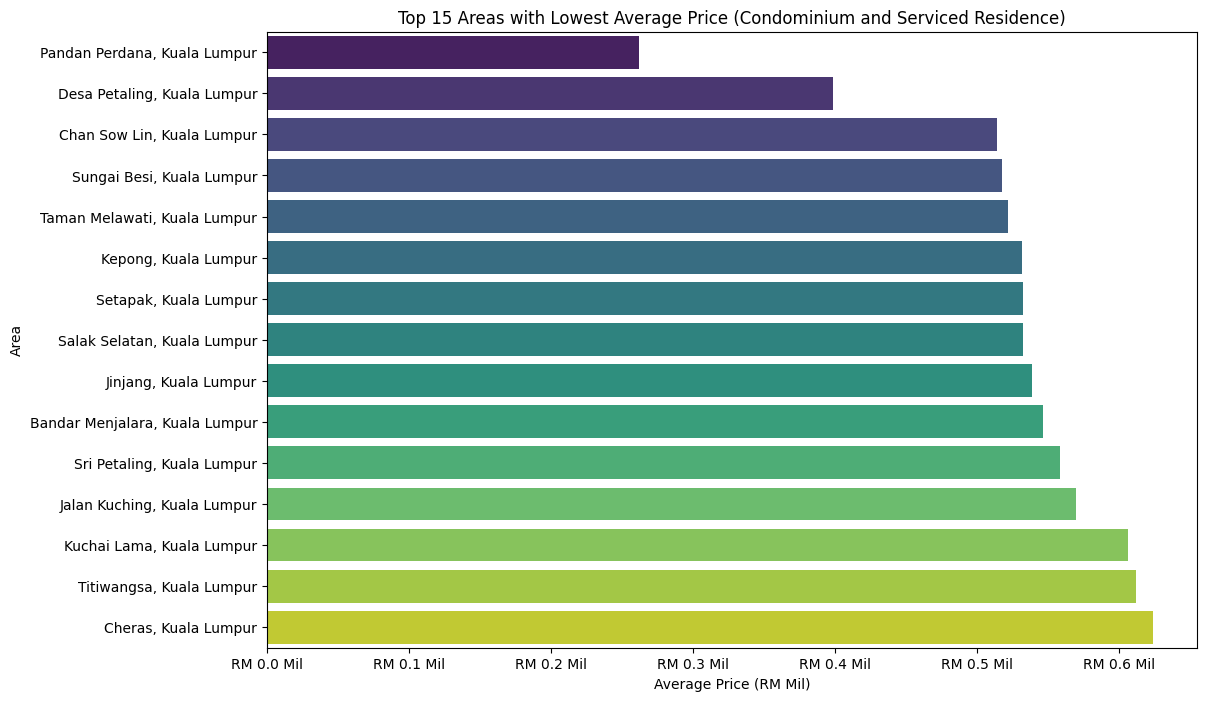

In [ ]:
# Calculate average price per area
avg_price_per_area_low = condo_serviced.groupby('Location')['Price'].mean().sort_values(ascending=True).head(15)

# Plotting the top 15 areas by average price
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_per_area_low.values, y=avg_price_per_area_low.index, palette='viridis')


# Customize x-axis ticks to display in million (RM Mil)
formatter = FuncFormatter(lambda x, _: f'RM {x / 10**6:.1f} Mil')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 15 Areas with Lowest Average Price (Condominium and Serviced Residence)')
plt.xlabel('Average Price (RM Mil)')
plt.ylabel('Area')
plt.show()

# Number of Rooms


The number of rooms contains some irregularities. For example, it is common for rooms to be listed as N+M instead of the total number of rooms. I want to clean the Rooms column and introduce a numerical equivalent.



In [ ]:
sorted(properties["Rooms"].unique().astype(str))

['1',
 '1+1',
 '1+2',
 '10',
 '10+',
 '10+1',
 '11',
 '11+1',
 '12',
 '12+',
 '13',
 '13+',
 '13+1',
 '14',
 '15+',
 '16',
 '18',
 '2',
 '2+1',
 '2+2',
 '20 Above',
 '3',
 '3+1',
 '3+2',
 '4',
 '4+1',
 '4+2',
 '5',
 '5+1',
 '5+2',
 '6',
 '6+',
 '6+1',
 '7',
 '7+',
 '7+1',
 '8',
 '8+',
 '8+1',
 '9',
 '9+',
 '9+1',
 'Studio',
 'nan']

In [ ]:
# Import the regular expression module
import re

def convert_room_num(rooms):
    try:
        if rooms.endswith("+"):
            return int(rooms[:-1])
        if re.search("[0-9]+\+[0-9]+", rooms) is not None:
            tmp = rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if rooms == "20 Above":
            return 20
        if rooms == "Studio":
            return 1
        return int(rooms)
    except AttributeError:
        return rooms

properties["Rooms Num"] = properties["Rooms"].apply(convert_room_num)

In [ ]:
properties["Rooms Num"].value_counts(dropna=False)

Rooms Num
3.0     15938
4.0     13027
5.0      6827
2.0      6547
6.0      3747
1.0      3191
7.0      1564
NaN      1560
8.0       361
9.0       102
10.0       45
12.0       14
11.0        8
20.0        7
13.0        4
14.0        3
16.0        2
15.0        1
18.0        1
Name: count, dtype: int64

# Property Type

There are several different property types that are typical for Malaysia. A brief glance at the full list of property types seems overwhelming at first.



In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('real_estate.csv')

# Display the first few rows to understand its structure
print(df.head())

                          Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        NaN   
4        Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  


In [ ]:
properties["Property Type"].value_counts()

Property Type
Condominium                               11447
Serviced Residence                         7176
Condominium (Corner)                       5687
Condominium (Intermediate)                 5113
Serviced Residence (Intermediate)          3255
                                          ...  
4-sty Terrace/Link House (Penthouse)          1
3-sty Terrace/Link House (Triplex)            1
2-sty Terrace/Link House (Penthouse)          1
2.5-sty Terrace/Link House (Penthouse)        1
4.5-sty Terrace/Link House (Corner)           1
Name: count, Length: 95, dtype: int64

Greatly simplify the property types, however, by trimming information. For example, there are many different variations of the Terrace/Link houses that can be grouped together. I create a new category of only the property type "super groups".

In [ ]:
def simplify_property_type(prop_type):
    super_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium",
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse",
        "Flat", "Residential Land", "Cluster House"]
    for super_type in super_types:
        if re.search(super_type, prop_type, flags=re.IGNORECASE) is not None:
            return super_type

    return prop_type

properties["Property Type Supergroup"] = properties["Property Type"].apply(simplify_property_type)

In [ ]:
properties["Property Type Supergroup"].value_counts(dropna=False)

Property Type Supergroup
Condominium            23149
Serviced Residence     13399
Terrace/Link House      7567
Bungalow                3598
Semi-detached House     2102
Apartment               1621
Residential Land         669
Townhouse                508
Flat                     330
Cluster House              6
Name: count, dtype: int64

# Furnishing

The furnishing column thankfully doesn't require any cleaning.



In [ ]:
properties["Furnishing"].value_counts(dropna=False)

Furnishing
Partly Furnished    26222
Fully Furnished     13846
NaN                  6687
Unfurnished          5611
Unknown               583
Name: count, dtype: int64

# Size

The size apparently always has the same structure:



In [ ]:
"[Built-up/Land area] : [Value] sq. ft."

'[Built-up/Land area] : [Value] sq. ft.'

In [ ]:
properties[["Size"]].sample(25)

Size
15265    Built-up : 1,150 sq. ft.
13123      Built-up : 946 sq. ft.
21512    Built-up : 4,025 sq. ft.
22862    Built-up : 2,300 sq. ft.
3042     Land area : 3600 sq. ft.
5325     Land area : 6000 sq. ft.
24090    Built-up : 3,897 sq. ft.
458        Built-up : 823 sq. ft.
45066    Built-up : 1,100 sq. ft.
10355      Built-up : 766 sq. ft.
36241    Built-up : 3,335 sq. ft.
12418      Built-up : 490 sq. ft.
36957   Land area : 24x55 sq. ft.
43357    Built-up : 1,073 sq. ft.
22174      Built-up : 950 sq. ft.
44800  Land area : 45x100 sq. ft.
16835    Built-up : 2,638 sq. ft.
49996    Built-up : 1,295 sq. ft.
52793      Built-up : 893 sq. ft.
6693    Land area : 40x75 sq. ft.
19648    Land area : 9100 sq. ft.
50171    Built-up : 2,687 sq. ft.
41310     Land area : 640 sq. ft.
34309    Built-up : 1,614 sq. ft.
11243   Land area : 11282 sq. ft.

So I will create two new column that indicate whether this is built-up or land area and store the actual square footage.



In [ ]:
def split_size(val, index=0):
    try:
        return val.split(":")[index].strip()
    except AttributeError:
        return val

properties["Size Type"] = properties["Size"].apply(split_size, index=0)
properties["Size Num"] = properties["Size"].apply(split_size, index=1)

In [ ]:
properties["Size Type"].value_counts(dropna=False)


Size Type
Built-up     37493
Land area    14453
NaN           1003
Name: count, dtype: int64

Now I need to strip the new Size_num column and convert it to a numerical value.



In [ ]:
def convert_size_num(size):
    # Attempt to trim the numbers down. Most of this is done explicitly without
    # regex to avoid incorrect trimming, which would lead to the concatenation
    # of numbers. I would rather have missing values than incorrectly cleaned
    # numbers.
    try:
        # If it's not in square feet then I don't want to deal with all
        # possible conversions for now.
        if re.search(r"sq\.*\s*ft\.*", size) is None:
            return None

        size = size.replace(",", "")
        size = size.replace("'", "")
        size = size.replace("sq. ft.", "")
        size = size.replace("sf", "")
        size = size.strip()
        size = size.lower()

        add_mult_match = re.search(r"(\d+)\s*\+\s*(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if add_mult_match is not None:
            return int(add_mult_match.groups()[0]) + (
                int(add_mult_match.groups()[1]) *
                int(add_mult_match.groups()[2]))

        mult_match = re.search(r"(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if mult_match is not None:
            return int(mult_match.groups()[0]) * int(mult_match.groups()[1])

        return int(size)
    # If any of the above doesn't work, just turn it into None/NaN
    # We want to guarantee this column is numeric
    except:
        return None

properties["Size Num"] = properties["Size Num"].apply(convert_size_num)

Cleaning the property sizes introduced only a small number of additional missing values.

In [ ]:
print("Properties with missing raw size data: {}".format(properties["Size"].isna().sum()))
print("Properties with missing size type data: {}".format(properties["Size Type"].isna().sum()))
print("Properties with missing size num data: {}".format(properties["Size Num"].isna().sum()))

Properties with missing raw size data: 1003
Properties with missing size type data: 1003
Properties with missing size num data: 1313


I will synchronize the missing values between the Size Type and Size Num columns.

In [ ]:
properties.loc[properties["Size Num"].isna(), "Size Type"] = None

In [ ]:
properties.loc[:, "Size Type"].value_counts(dropna=False)

Size Type
Built-up     37455
Land area    14181
None          1313
Name: count, dtype: int64

# Other columns

The number of bathrooms and car parks are standardized and do not require any further cleaning.

In [ ]:
properties["Bathrooms"].value_counts(dropna=False)

Bathrooms
2.0     21163
3.0      9331
4.0      6522
5.0      4717
1.0      4482
6.0      3172
NaN      1866
7.0      1031
8.0       402
9.0       142
10.0       70
12.0       14
11.0       11
20.0       10
15.0        6
13.0        5
14.0        4
16.0        1
Name: count, dtype: int64

In [ ]:
properties["Car Parks"].value_counts(dropna=False)

Car Parks
NaN     17042
2.0     15174
1.0     13622
3.0      3798
4.0      1913
6.0       623
5.0       501
8.0        91
10.0       76
7.0        62
12.0        7
15.0        7
13.0        7
9.0         4
28.0        4
11.0        4
20.0        4
30.0        4
16.0        2
17.0        2
18.0        1
24.0        1
Name: count, dtype: int64

# Price per Area / Room

As a last step, I want to introduce the price per area and price per rooms as features

In [ ]:
properties["Price per Area"] = properties["Price"] / properties["Size Num"]
properties["Price per Room"] = properties["Price"] / properties["Rooms Num"]

# Save Preprocessed Data

In [ ]:
properties.to_csv("Properties_preprocessed.csv")

# Data Exploration

The most immediate question will be how properties differ between neighborhoods in their characteristics.

In [ ]:
def plot_by_neighborhood(feature, formatting, factor=1):
    df = properties.groupby("Location")[feature].median().sort_values(ascending=False).reset_index()
    shift = 0.1 * (df[feature].max() - df[feature].min())
    df_sizes = properties.groupby("Location").size()[df["Location"]]

    fig = sns.catplot(
        data=df, x=feature, y="Location", kind="bar",
        color="darkgrey", height=10, aspect=0.8)

    for index, row in df.iterrows():
        fig.ax.text(
            row[feature] + shift, row.name, formatting.format(row[feature] / factor),
            color='black', ha="center", va="center")

    fig.ax.get_xaxis().set_visible(False);
    fig.despine(left=True, bottom=True)
    fig.ax.tick_params(left=False, bottom=False);
    fig.set_ylabels("");

# Total Prices per Neighborhood

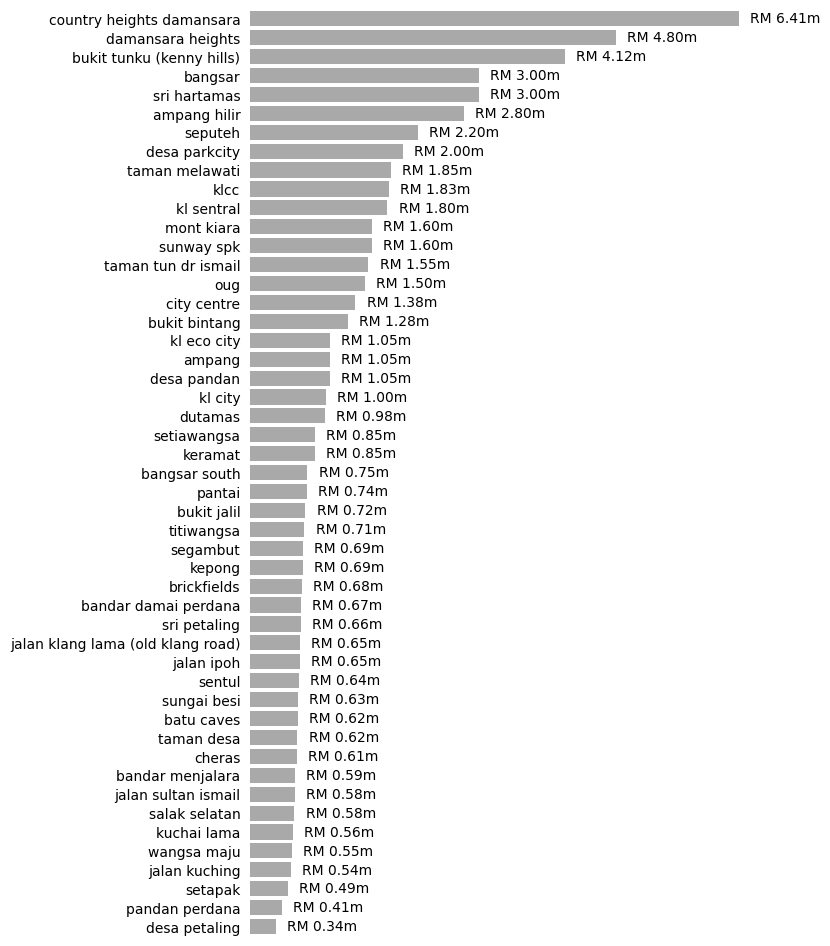

In [ ]:
plot_by_neighborhood(feature="Price", formatting="RM {:.2f}m", factor = 1e6)

# Price per Square Foot per Neighborhood

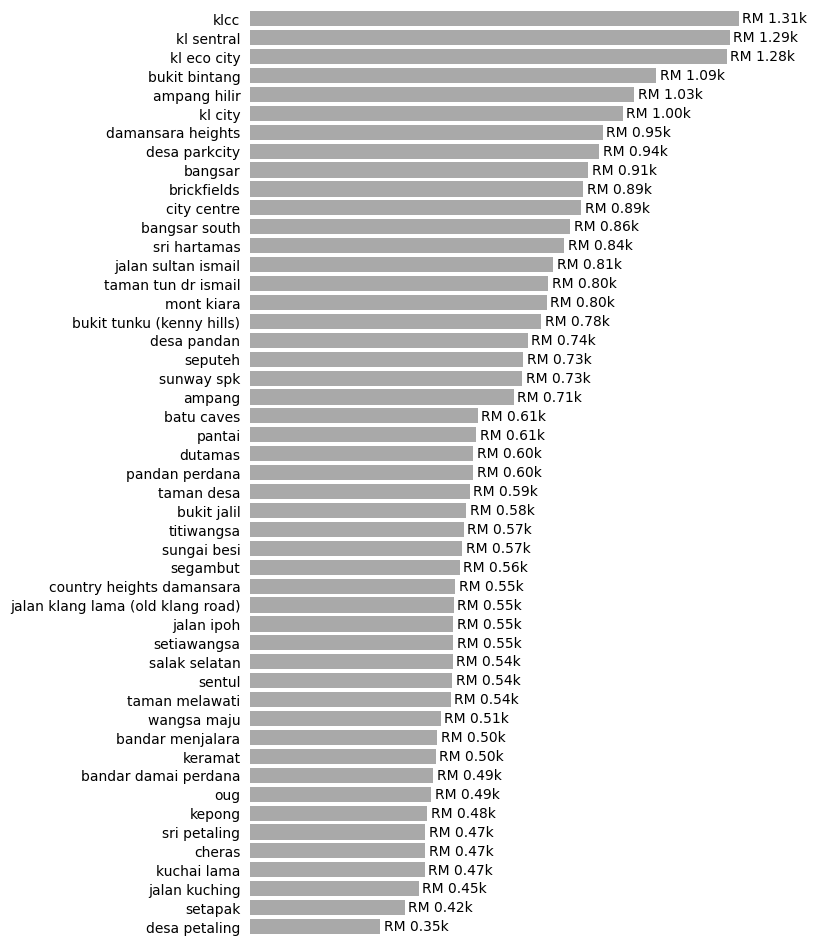

In [ ]:
plot_by_neighborhood(feature="Price per Area", formatting="RM {:.2f}k", factor = 1e3)

# Price per Room per Neighborhood

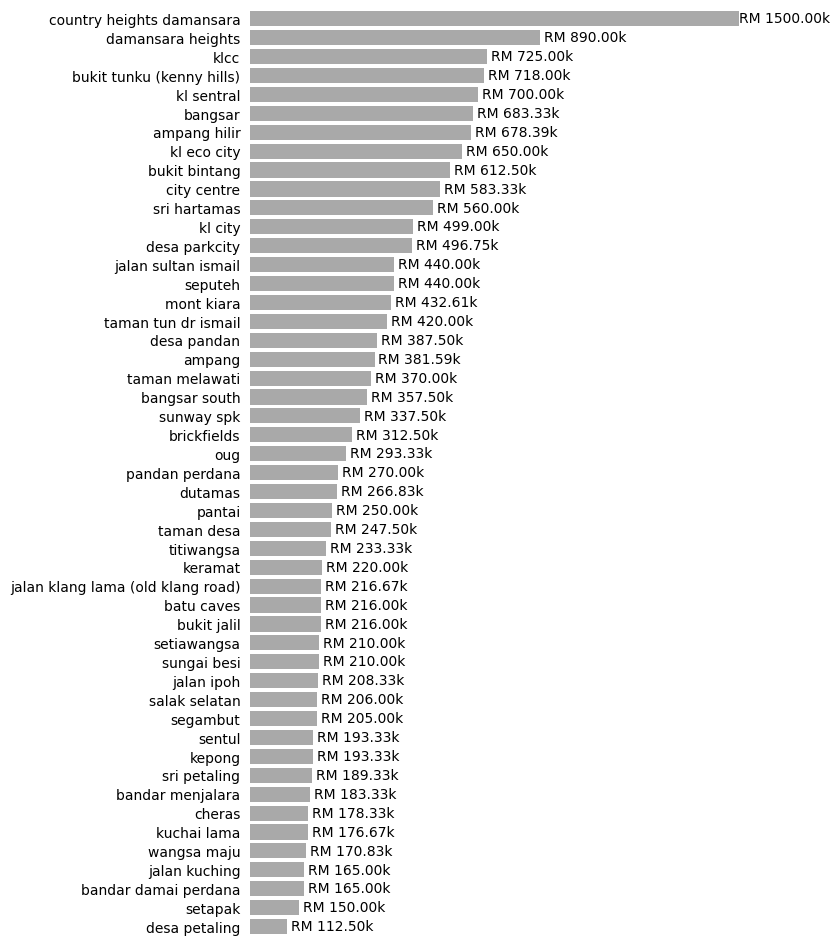

In [ ]:
plot_by_neighborhood(feature="Price per Room", formatting="RM {:.2f}k", factor = 1e3)

# Property Size per Neighborhood

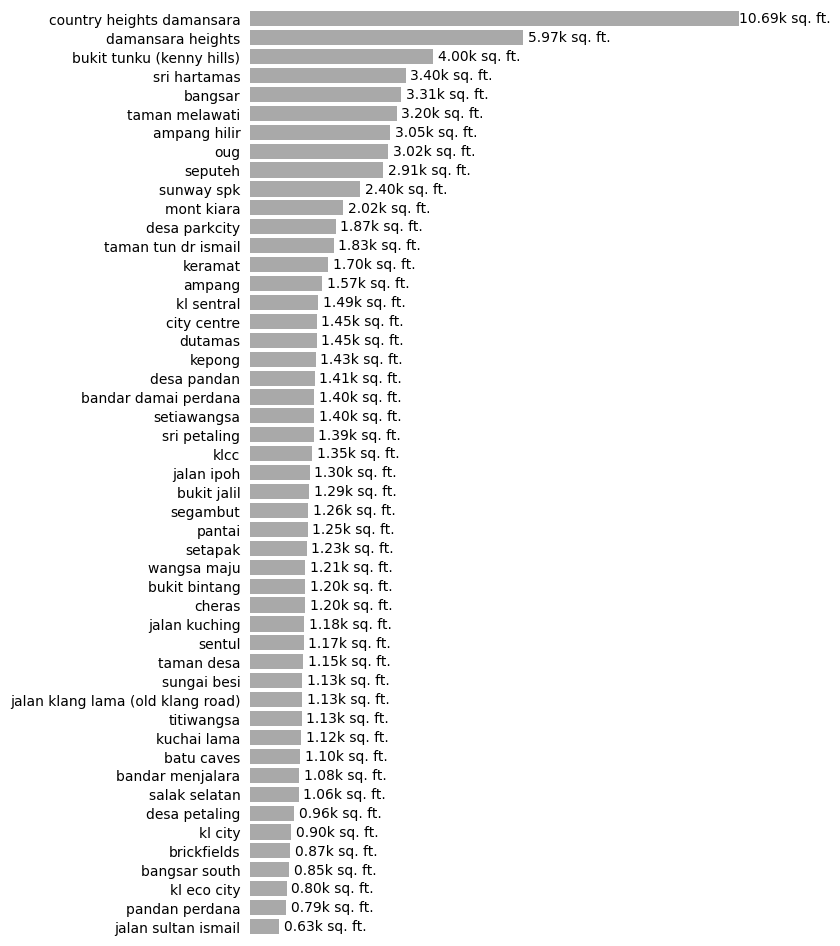

In [ ]:
plot_by_neighborhood(feature="Size Num", formatting="{:.2f}k sq. ft.", factor = 1e3)

# Rooms per Neighborhood

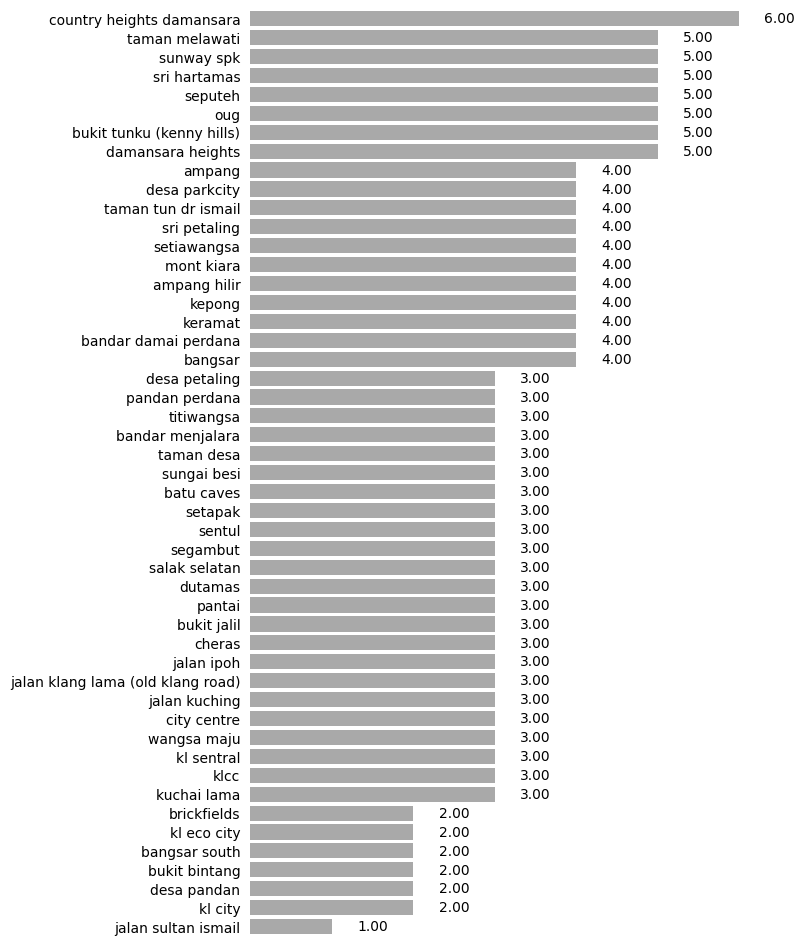

In [ ]:
plot_by_neighborhood(feature="Rooms Num", formatting="{:.2f}", factor = 1)

# Number of Properties per Neighborhood

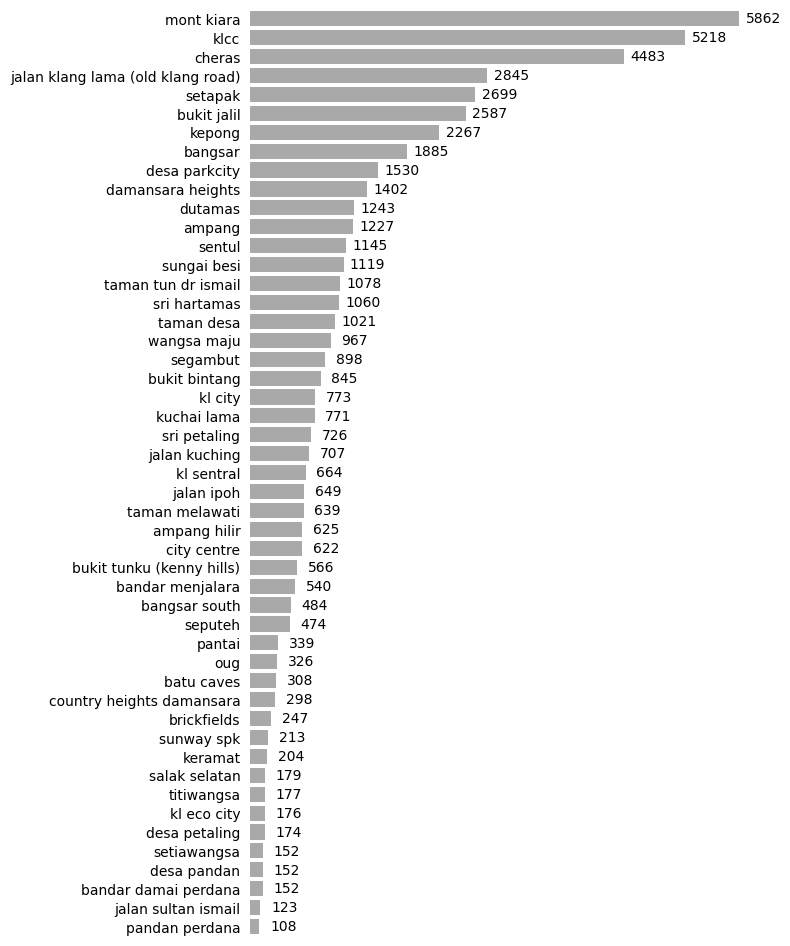

In [ ]:
df = properties.groupby("Location").size().sort_values(ascending=False).reset_index()
shift = 0.05 * (df[0].max() - df[0].min())
df_sizes = properties.groupby("Location").size()[df["Location"]]

fig = sns.catplot(
    data=df, x=0, y="Location", kind="bar",
    color="darkgrey", height=10, aspect=0.8)

for index, row in df.iterrows():
    fig.ax.text(
        row[0] + shift, row.name, row[0],
        color='black', ha="center", va="center")

fig.ax.get_xaxis().set_visible(False);
fig.despine(left=True, bottom=True)
fig.ax.tick_params(left=False, bottom=False);
fig.set_ylabels("");

# Most common Property Type per Neighborhood

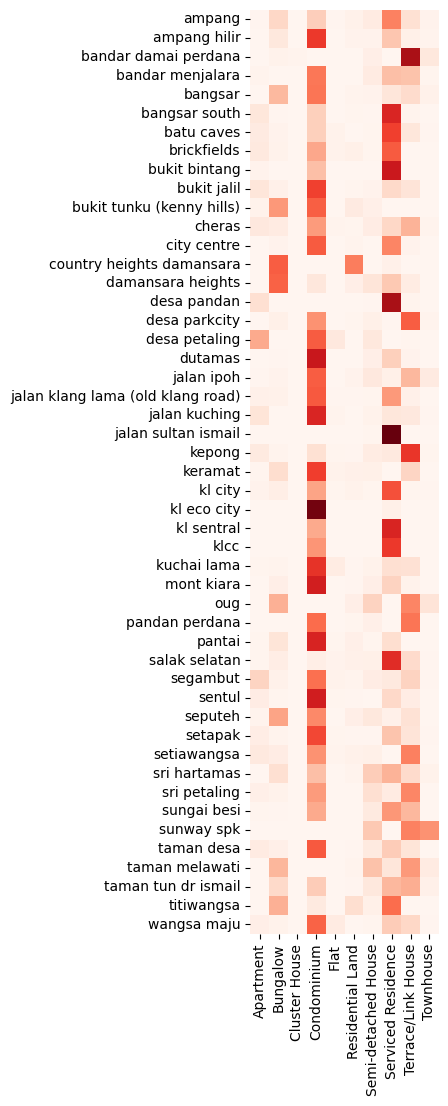

In [ ]:
# Extract property type and turn it into a two-column data frame
df = properties.loc[~properties["Property Type Supergroup"].isna()].groupby(
    "Location")["Property Type Supergroup"].value_counts()
df.name = "Value"
df = df.reset_index().pivot(index="Location", columns="Property Type Supergroup")
df.columns = df.columns.droplevel(0)
df = df.fillna(0)

# normalize rows to see relative amount of properties in each neighborhood
df_norm = df.apply(lambda x: x / x.sum(), axis=1)

fix, ax = plt.subplots(figsize=(12, 12))
hmap = sns.heatmap(
    df_norm, square=True, vmin=0, cmap="Reds", ax=ax, cbar=False)
hmap.set_ylabel(None);
hmap.set_xlabel(None);

# Land vs. Built-Up Area per Neighborhood

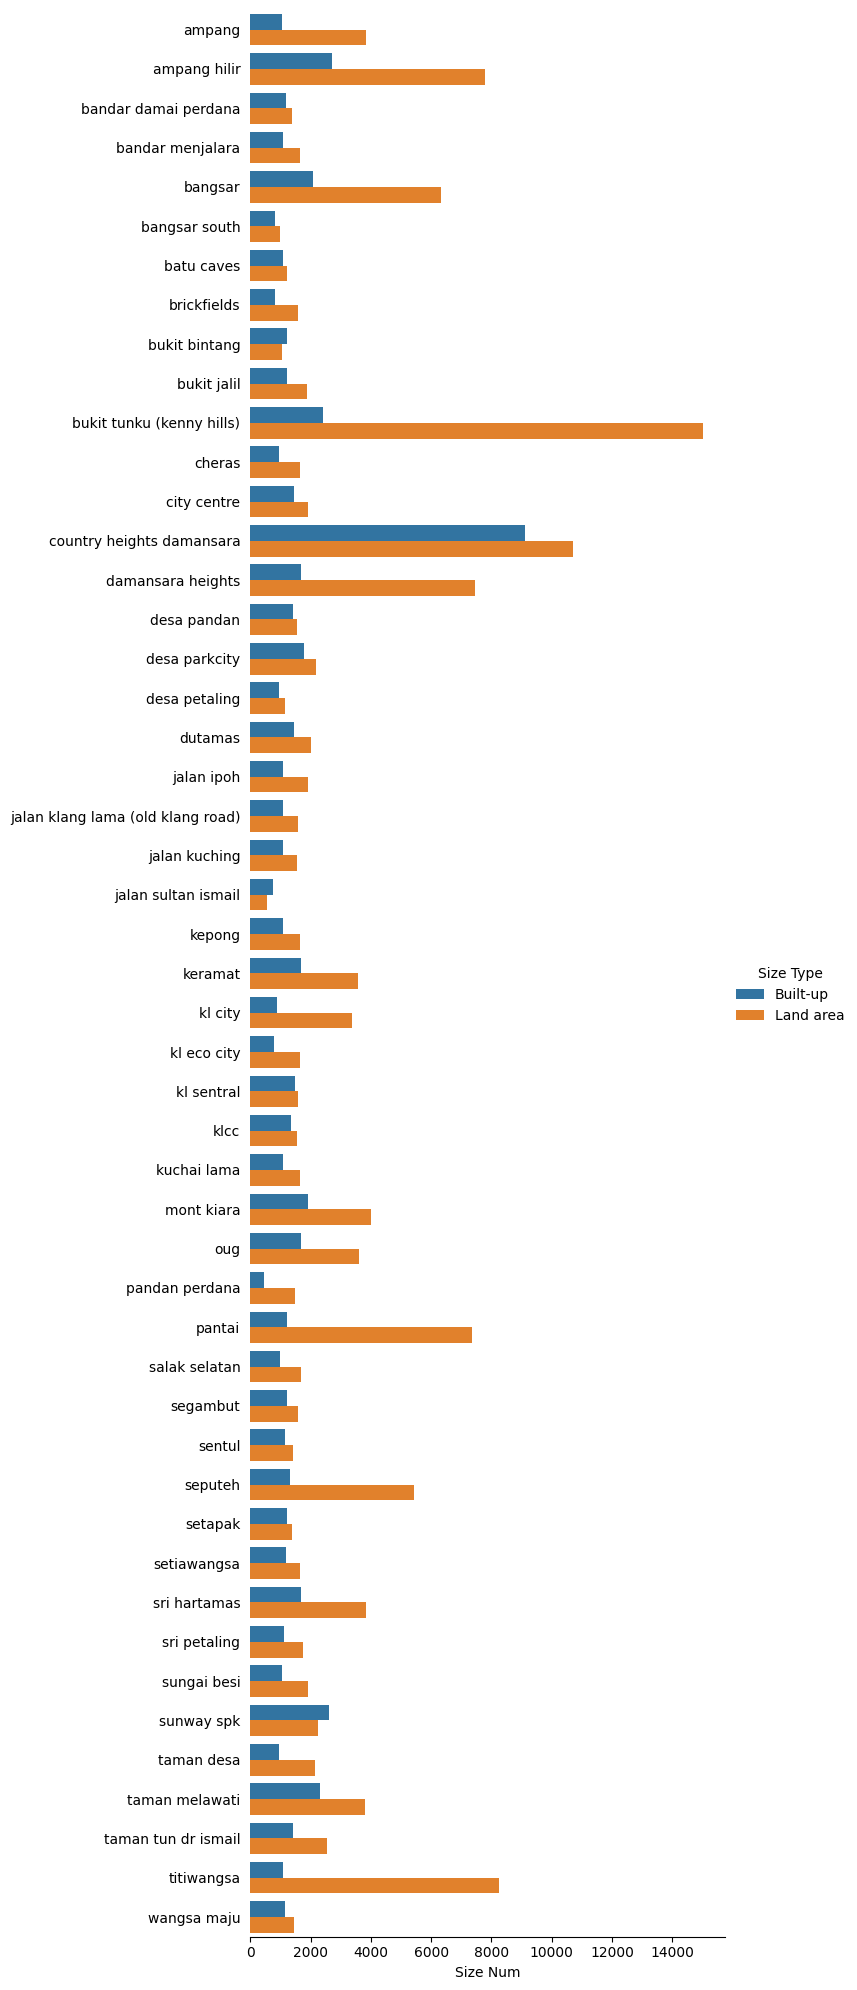

In [ ]:
df = properties[["Location", "Size Type", "Size Num"]].groupby(
    ["Location", "Size Type"]).median().reset_index()
fig = sns.catplot(
    data=df, x="Size Num", y="Location", kind="bar",
    hue="Size Type", height=20, aspect=0.4);

fig.despine(left=True)
fig.ax.tick_params(left=False);
fig.set_ylabels("");

# Predictive Modelling

In [ ]:
# Remove entries with "land area" in the "Size Type" column
Xy = properties.loc[properties["Size Type"] == "Built-up"]

# Keep only the relevant features
Xy = Xy.loc[:, [
    "Location", "Bathrooms", "Car Parks", "Furnishing",
    "Rooms Num", "Property Type Supergroup", "Size Num",
    "Price", "Price per Area", "Price per Room"]]

# Fill missing Car Parks feature values
Xy.loc[:, "Car Parks"] = Xy["Car Parks"].fillna(0)

# Remove entries with missing values
Xy = Xy.loc[Xy.isna().sum(axis=1) == 0]

# Specifically remove entries with "Unknown" furnishing status
Xy = Xy.loc[Xy["Furnishing"] != "Unknown"]

# Convert to dummy features
Xy = pd.get_dummies(Xy)

In [ ]:
print("Shape of data frame: {}".format(Xy.shape))

Shape of data frame: (32413, 68)


The data frame now consists of only numerical features:



In [ ]:
print("Data frame DTYPES:")
for dtype in Xy.dtypes.unique():
    print(" - {}".format(dtype))

Data frame DTYPES:
 - float64
 - int64
 - bool


# Feature Selection

Outlier removal

 Size Num outliers heuristically. The smallest reasonable value, as can be seen from the data, corresponds to 250
 square feet. This corresponds to a small studio apartment.

In [ ]:
Xy["Size Num"].sort_values().head(10)

7724      11.0
26309    250.0
44334    250.0
43156    250.0
23544    250.0
49397    250.0
53436    250.0
33466    250.0
42080    250.0
52309    250.0
Name: Size Num, dtype: float64

On the opposite end of the spectrum, there appear to be several unreasonably large properties ( 820000
  square feet corresponds to the approximate size of the Louvre museum in Paris, France). I heuristically set the cutoff at  20000
  square feet for the maximum size of a property.

In [ ]:
Xy["Size Num"].sort_values(ascending=False).head(20)

26310    820000.0
2437     790000.0
23507    690000.0
9339     576000.0
50850    320015.0
43550    166821.0
50824     60000.0
28733     50000.0
21072     23716.0
45085     19180.0
28888     18222.0
19070     17000.0
43686     17000.0
12089     16500.0
27843     15000.0
52747     14875.0
4688      14570.0
38448     14410.0
51742     13939.0
52636     13000.0
Name: Size Num, dtype: float64

In [ ]:
Xy = Xy.loc[Xy["Size Num"].between(250, 20000)]

From the remaining three originally numerical columns, Bathrooms, Car Parks, and Rooms Num, I trim the top and bottom  0.1%
  of all entries.

In [ ]:
selectors = []
for feature in ["Bathrooms", "Car Parks", "Rooms Num"]:
    selectors.append(Xy[feature].between(
        Xy[feature].quantile(0.001),
        Xy[feature].quantile(0.999)))

Xy = Xy.loc[(~pd.DataFrame(selectors).T).sum(axis=1) == 0]

All further feature selection will be performed on a subset of the data that will not be used for training the model itself to avoid overfitting.



In [ ]:
Xy.shape

(32347, 68)

# Feature Scaling

First, the original numerical features must be scaled

<ipython-input-83-ab18094015fc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Xy["Size Num"], bins=50, ax=ax[1, 1], color="darkgrey");


Text(0.5, 1.0, 'Size Num')

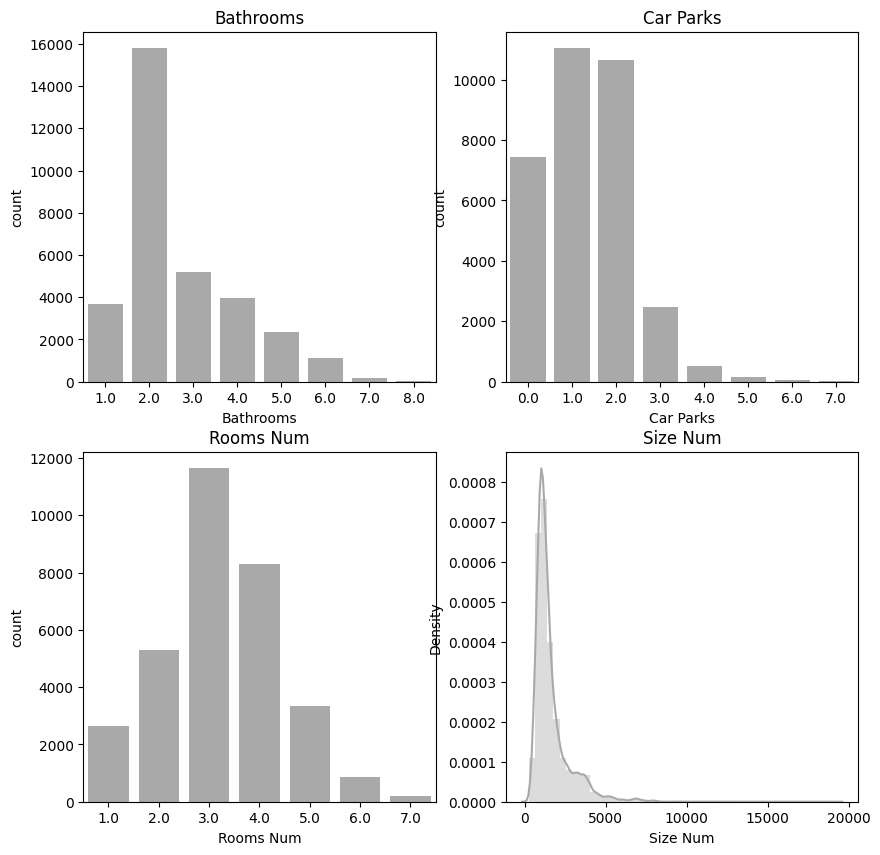

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10));
# It seems like Xy was renamed to Xy_feature_selection
sns.countplot(data=Xy, x="Bathrooms", ax=ax[0, 0], color="darkgrey");
ax[0, 0].set_title("Bathrooms");
sns.countplot(data=Xy, x="Car Parks", ax=ax[0, 1], color="darkgrey");
ax[0, 1].set_title("Car Parks");
sns.countplot(data=Xy, x="Rooms Num", ax=ax[1, 0], color="darkgrey");
ax[1, 0].set_title("Rooms Num");
sns.distplot(a=Xy["Size Num"], bins=50, ax=ax[1, 1], color="darkgrey");
ax[1, 1].set_title("Size Num")

As none of the features seem to be normally distributed, simply scale them to lie between 0 and 1. Note that the data sets for training and feature selection are scaled separately!


In [ ]:
!pip install scikit-learn
import sklearn.preprocessing

cols = ["Bathrooms", "Car Parks", "Rooms Num", "Size Num"]
# Xy_feature_selection was not defined. Changing to Xy
Xy[cols] = sklearn.preprocessing.MinMaxScaler().fit_transform(
    Xy[cols])
Xy[cols] = sklearn.preprocessing.MinMaxScaler().fit_transform(Xy[cols])

# Feature Correlation

 the correlation between the initial numerical features to determine if they can be pruned.

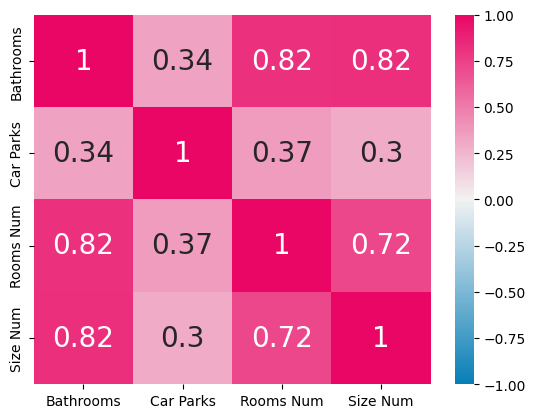

In [ ]:
hm_cmap = sns.diverging_palette(240, 0, s=99, l=50, as_cmap=True)
# Xy_feature_selection was not defined. Changing to Xy
df = Xy[["Bathrooms", "Car Parks", "Rooms Num", "Size Num"]].corr()
sns.heatmap(data=df, vmin=-1, vmax=1, cmap=hm_cmap, annot=df, annot_kws={"size": 20});

Based on the above correlation matrix, the features Bathrooms and Rooms Num both correlate very strongly with Size Num and can be safely removed.

Remove the actual features from the dataset(s)

In [ ]:
# Check if the columns exist before trying to drop them
if "Bathrooms" in Xy.columns and "Rooms Num" in Xy.columns:
    Xy = Xy.drop(["Bathrooms", "Rooms Num"], axis=1)
else:
    print("Columns already dropped.")

Columns already dropped.


In addition to the features, also want to look at the potential target variables and how they correlate.



<Axes: >

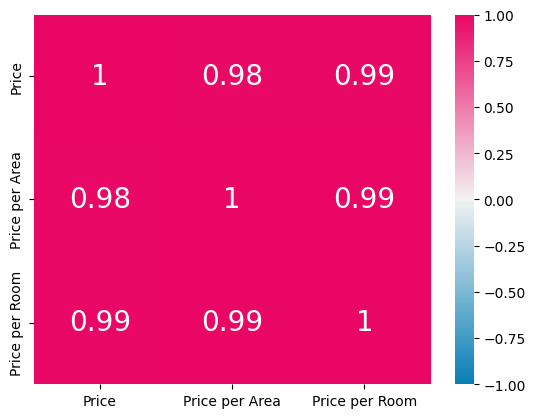

In [ ]:
# Ensure that Xy_feature_selection is defined and holds the correct data
# If Xy_feature_selection was derived from Xy, you might need to rerun the cells that created it
Xy_feature_selection = Xy # Or whatever the correct DataFrame is

df = Xy_feature_selection[["Price", "Price per Area", "Price per Room"]].corr()
sns.heatmap(
    df, vmin=-1, vmax=1, cmap=hm_cmap,
    annot=np.round(df, 2), annot_kws={"size": 20})

Price per Area and Price per Room correlate very strongly so that it makes little sense to retain both. I consequently remove Price per Room.

In [ ]:
Xy = Xy.drop("Price per Room", axis=1)
Xy_feature_selection = Xy_feature_selection.drop("Price per Room", axis=1)

# Modelling
Split data into training and test set

In [ ]:
import sklearn.model_selection # Import the model_selection module from sklearn
from sklearn.model_selection import train_test_split # Import the train_test_split function

Xy_train, Xy_test = train_test_split(Xy, test_size=0.2, random_state=101) # Call the imported function
X_train = Xy_train.drop(["Price", "Price per Area"], axis=1)
y_train = Xy_train[["Price", "Price per Area"]]
X_test = Xy_test.drop(["Price", "Price per Area"], axis=1)
y_test = Xy_test[["Price", "Price per Area"]]

Define convenience function to train and test a scikit-learn model.



In [ ]:
def train_and_test_model(
        model, X_train=X_train, y_train=y_train,
        X_test=X_test, y_test=y_test, **kwargs):
    model.fit(X_train, y_train, **kwargs)
    y_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score(y_true=y_test, y_pred=y_pred)
    return model, r2

In [ ]:
!pip install scikit-learn # Install the scikit-learn library
import sklearn.linear_model # Import the linear_model from sklearn
from sklearn.model_selection import train_test_split # Import the train_test_split function

Xy_train, Xy_test = train_test_split(Xy, test_size=0.2, random_state=101) # Call the imported function
X_train = Xy_train.drop(["Price", "Price per Area"], axis=1)
y_train = Xy_train[["Price", "Price per Area"]]
X_test = Xy_test.drop(["Price", "Price per Area"], axis=1)
y_test = Xy_test[["Price", "Price per Area"]]

def train_and_test_model(
        model, X_train=X_train, y_train=y_train,
        X_test=X_test, y_test=y_test, **kwargs):
    model.fit(X_train, y_train, **kwargs)
    y_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score(y_true=y_test, y_pred=y_pred)
    return model, r2

model, r2 = train_and_test_model(
    model = sklearn.linear_model.LinearRegression(),
    X_train=X_train, y_train=y_train["Price"],
    X_test=X_test, y_test=y_test["Price"])
print("R^2 for prediction of 'Price': {:.2f}".format(r2))

model, r2 = train_and_test_model(
    model = sklearn.linear_model.LinearRegression(),
    X_train=X_train, y_train=y_train["Price per Area"],
    X_test=X_test, y_test=y_test["Price per Area"])
print("R^2 for prediction of 'Price per Area': {:.2f}".format(r2))

R^2 for prediction of 'Price': 0.61
R^2 for prediction of 'Price per Area': 0.51


Neither of the targets can be predicted with a satisfying accuracy. This is most likely due to the overwhelming number of sparse binary features. A neural network, unfortunately, also does not perform satisfactorily.

In [ ]:
def make_fcn_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(units=32, activation="relu"))
    model.add(keras.layers.Dense(units=32, activation="relu"))
    model.add(keras.layers.Dense(units=1, activation="relu"))
    model.compile(loss="mse", optimizer="Adam")
    return model

In [ ]:
!pip install tensorflow # Install the tensorflow package
import tensorflow.keras as keras # Import keras from tensorflow

def make_fcn_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(units=32, activation="relu"))
    model.add(keras.layers.Dense(units=32, activation="relu"))
    model.add(keras.layers.Dense(units=1, activation="relu"))
    model.compile(loss="mse", optimizer="Adam")
    return model

# Data Preprocessing and Cleaning

Clean the collected data (handling missing values, outliers, and inconsistencies)
Steps:
Check for missing values in each column and decide how to handle them (e.g., remove, fill with mean/median, or use forward/backward fill).
Handle outliers: Outliers can be detected using statistical methods like IQR (Interquartile Range) or Z-scores.
Fix inconsistencies: Identify data entries that don’t match the expected format, such as incorrect price formats or spelling inconsistencies.

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
properties = pd.read_csv('real_estate.csv')

# Check for missing values
missing_values = properties.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Option 1: Drop rows with missing values (if too few)
properties_cleaned = properties.dropna()

# Option 2: Fill missing values (e.g., fill numeric columns with median, categorical with mode)
# Fixing inconsistencies in the format of price column before calculating the median
properties['Price'] = properties['Price'].replace(r'[^0-9]', '', regex=True).astype(float) # Remove non-numeric characters and convert to float
properties['Price'].fillna(properties['Price'].median(), inplace=True) # Now calculate the median and fill missing values
properties['Location'].fillna(properties['Location'].mode()[0], inplace=True)

# Handle outliers in 'Price' using IQR
Q1 = properties['Price'].quantile(0.25)
Q3 = properties['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that contain outliers
properties_cleaned = properties[(properties['Price'] >= lower_bound) & (properties['Price'] <= upper_bound)]

# This line is no longer needed as we've already cleaned the Price column
# properties_cleaned['Price'] = properties_cleaned['Price'].replace(r'[^0-9]', '', regex=True).astype(float)

Missing values in each column:
Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64


Perform necessary transformations
Steps:
Convert categorical variables to numerical formats using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features to bring them to a common scale.

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
properties = pd.read_csv('real_estate.csv')

# Check for missing values
missing_values = properties.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Option 1: Drop rows with missing values (if too few)
#properties_cleaned = properties.dropna() # This line was dropping all rows with missing values. Commenting it out

# Option 2: Fill missing values (e.g., fill numeric columns with median, categorical with mode)
# Fixing inconsistencies in the format of price column before calculating the median
properties['Price'] = properties['Price'].replace(r'[^0-9]', '', regex=True).astype(float) # Remove non-numeric characters and convert to float
properties['Price'].fillna(properties['Price'].median(), inplace=True) # Now calculate the median and fill missing values
properties['Location'].fillna(properties['Location'].mode()[0], inplace=True)

# Handle outliers in 'Price' using IQR
Q1 = properties['Price'].quantile(0.25)
Q3 = properties['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that contain outliers
properties_cleaned = properties[(properties['Price'] >= lower_bound) & (properties['Price'] <= upper_bound)]

# This line is no longer needed as we've already cleaned the Price column
# properties_cleaned['Price'] = properties_cleaned['Price'].replace(r'[^0-9]', '', regex=True).astype(float)

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Converting categorical columns (e.g., 'Location') to numerical using Label Encoding
label_encoder = LabelEncoder()
properties_cleaned['Location'] = label_encoder.fit_transform(properties_cleaned['Location'])

# If there are more complex categorical variables, use One-Hot Encoding
# Check if 'Type' column exists
if 'Type' in properties_cleaned.columns:
    properties_cleaned = pd.get_dummies(properties_cleaned, columns=['Type'], drop_first=True) # Now this line should work correctly as the 'Type' column is available
else:
    print("Column 'Type' not found in DataFrame")


# Normalize numerical features (e.g., 'Price')
scaler = StandardScaler()
properties_cleaned['Price'] = scaler.fit_transform(properties_cleaned[['Price']])

Missing values in each column:
Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64
Column 'Type' not found in DataFrame


<ipython-input-108-4c9f65ed7568>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_cleaned['Location'] = label_encoder.fit_transform(properties_cleaned['Location'])
<ipython-input-108-4c9f65ed7568>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_cleaned['Price'] = scaler.fit_transform(properties_cleaned[['Price']])


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('real_estate.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB
None
                          Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        Na

In [3]:
# Check for missing values in the dataset
print(df.isnull().sum())


Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64


In [6]:
# Define a function to detect and remove outliers
def remove_outliers_iqr(df, column):
    # Convert the column to numeric type, handling errors
    df[column] = pd.to_numeric(df[column], errors='coerce')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply this to columns with outliers
df_clean = remove_outliers_iqr(df, 'Price')


In [7]:
# Strip spaces and convert all text columns to lowercase
df['Property Type'] = df['Property Type'].str.strip().str.lower()
df['Location'] = df['Location'].str.strip().str.lower()


In [8]:
# Remove currency symbols and commas from the Price column
df['Price'] = df['Price'].replace({'RM ': '', ',': ''}, regex=True).astype(float)


In [9]:
# Drop duplicate rows
df_clean = df.drop_duplicates()


In [10]:
# Final check for missing values and outliers
print(df_clean.isnull().sum())

# Display the first few rows of the cleaned dataset
print(df_clean.head())


Location             0
Price            39801
Rooms             1492
Bathrooms         1764
Car Parks        14103
Property Type       18
Size               873
Furnishing        5657
dtype: int64
                          Location  Price Rooms  Bathrooms  Car Parks  \
0               klcc, kuala lumpur    NaN   2+1        3.0        2.0   
1  damansara heights, kuala lumpur    NaN     6        7.0        NaN   
2            dutamas, kuala lumpur    NaN     3        4.0        2.0   
3             cheras, kuala lumpur    NaN   NaN        NaN        NaN   
4        bukit jalil, kuala lumpur    NaN   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    serviced residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  condominium (corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  condominium

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv('real_estate.csv')

# Remove currency symbols and commas from Price column
df['Price'] = df['Price'].replace({'RM ': '', ',': ''}, regex=True) # Remove currency symbols and commas

# Handle missing values
df['Price'] = df['Price'].fillna(df['Price'].median())  # Fill missing prices with the median
df['Property Type'] = df['Property Type'].fillna('Unknown')  # Fill missing property types with 'Unknown'

# Convert Price column to float
df['Price'] = df['Price'].astype(float)

# Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = remove_outliers_iqr(df, 'Price')

# Standardize text columns
df_clean['Property Type'] = df_clean['Property Type'].str.strip().str.lower()
df_clean['Location'] = df_clean['Location'].str.strip().str.lower()


# Drop duplicates
df_clean = df_clean.drop_duplicates()

# Final check for missing values and outliers
print(df_clean.isnull().sum())

# Show the cleaned data
print(df_clean.head())


Location             0
Price                0
Rooms              884
Bathrooms         1117
Car Parks        13679
Property Type        0
Size               969
Furnishing        5496
dtype: int64
                    Location      Price Rooms  Bathrooms  Car Parks  \
0         klcc, kuala lumpur  1250000.0   2+1        3.0        2.0   
2      dutamas, kuala lumpur  1030000.0     3        4.0        2.0   
3       cheras, kuala lumpur   990000.0   NaN        NaN        NaN   
4  bukit jalil, kuala lumpur   900000.0   4+1        3.0        2.0   
6      seputeh, kuala lumpur   990000.0   NaN        NaN        NaN   

          Property Type                      Size        Furnishing  
0    serviced residence  Built-up : 1,335 sq. ft.   Fully Furnished  
2  condominium (corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3               unknown                       NaN               NaN  
4  condominium (corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
6               unknown   

<ipython-input-12-42566be71791>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Property Type'] = df_clean['Property Type'].str.strip().str.lower()
<ipython-input-12-42566be71791>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Location'] = df_clean['Location'].str.strip().str.lower()


Integrate data from different sources into a cohesive dataset.

In [22]:
import pandas as pd

import pandas as pd

# Load the real estate dataset
real_estate = pd.read_csv('real_estate.csv')

# Create a second dataset for integration (hypothetical)
other_data = pd.DataFrame({
    'Location': ['kuala lumpur', 'penang', 'selangor', 'johor', 'perak'],
    'Population': [1800000, 1600000, 1200000, 1000000, 800000],
    'Median Income': [5000, 4500, 4000, 3500, 3000]
})

# Merge the two datasets on the 'Location' column
merged_data = pd.merge(real_estate, other_data, on='Location', how='left')

# Handle missing values (if any locations in real_estate don't exist in other_data)
merged_data['Population'] = merged_data['Population'].fillna(merged_data['Population'].mean())
merged_data['Median Income'] = merged_data['Median Income'].fillna(merged_data['Median Income'].median())

# Drop duplicates or irrelevant columns if necessary
merged_data = merged_data.drop_duplicates()

# Display the integrated dataset
print(merged_data.head())


                          Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        NaN   
4        Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  \
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished   
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished   
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished   
3                   NaN                       NaN               NaN   
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished   

   Population  Median Income  
0         NaN            NaN  
1         NaN            NaN  

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [24]:
# Check for categorical columns
print(real_estate_cleaned.select_dtypes(include=['object']).columns)

# Perform one-hot encoding on categorical variables
real_estate_encoded = pd.get_dummies(real_estate_cleaned, columns=['Property Type', 'Location'], drop_first=True)

# Check the dataset after encoding
print(real_estate_encoded.head())



Index(['Location', 'Price', 'Rooms', 'Property Type', 'Size', 'Furnishing'], dtype='object')
          Price Rooms  Bathrooms  Car Parks                      Size  \
0  RM 1,250,000   2+1        3.0        2.0  Built-up : 1,335 sq. ft.   
2  RM 1,030,000     3        4.0        2.0  Built-up : 1,875 sq. ft.   
4    RM 900,000   4+1        3.0        2.0  Built-up : 1,513 sq. ft.   
5  RM 5,350,000   4+2        5.0        4.0  Land area : 7200 sq. ft.   
7  RM 2,600,000     5        4.0        4.0  Land area : 3600 sq. ft.   

         Furnishing  Property Type_1-sty Terrace/Link House (Corner)  \
0   Fully Furnished                                            False   
2  Partly Furnished                                            False   
4  Partly Furnished                                            False   
5  Partly Furnished                                            False   
7  Partly Furnished                                            False   

   Property Type_1-sty Terrace/Link

# Exploratory Data Analysis

In [ ]:
import pandas as pd

# Load the dataset
properties = pd.read_csv('real_estate.csv')

# Display basic information and the first few rows of the dataset
print(properties.info())
print(properties.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB
None
                          Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        Na

Summary Statistics
Get an overview of the numerical features
Missing Values
Check for missing values.

In [ ]:
print(properties.describe())

          Bathrooms     Car Parks
count  51870.000000  36316.000000
mean       3.073434      2.007848
std        1.631079      1.310427
min        1.000000      1.000000
25%        2.000000      1.000000
50%        2.000000      2.000000
75%        4.000000      2.000000
max       20.000000     30.000000


In [ ]:
print(properties.isnull().sum())

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64


Visualize Data
Libraries
You’ll need libraries like matplotlib, seaborn, and plotly for visualization.
Price Distribution
Visualize the distribution of property prices.
Price Trends
Analyze how prices vary with other features (e.g., location or property type).
Correlations
Examine the correlation matrix to see how features relate to each other.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

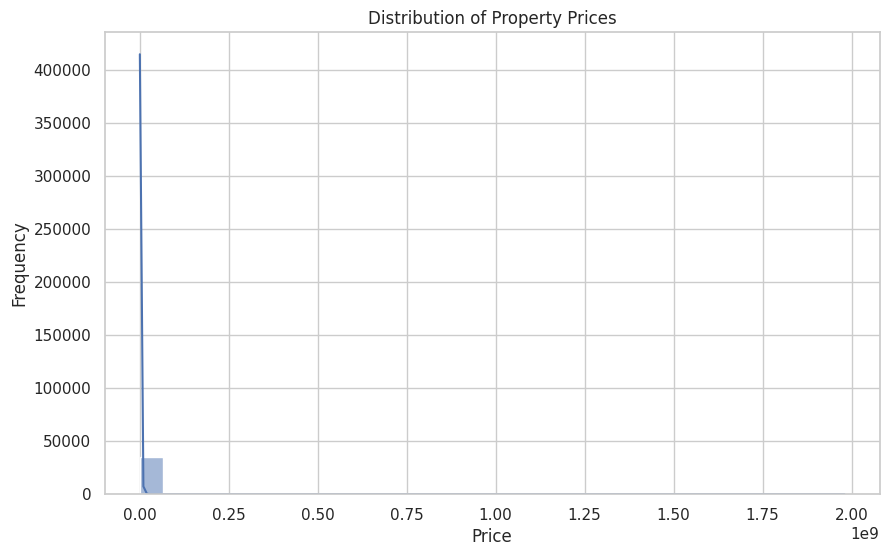

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(properties['Price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

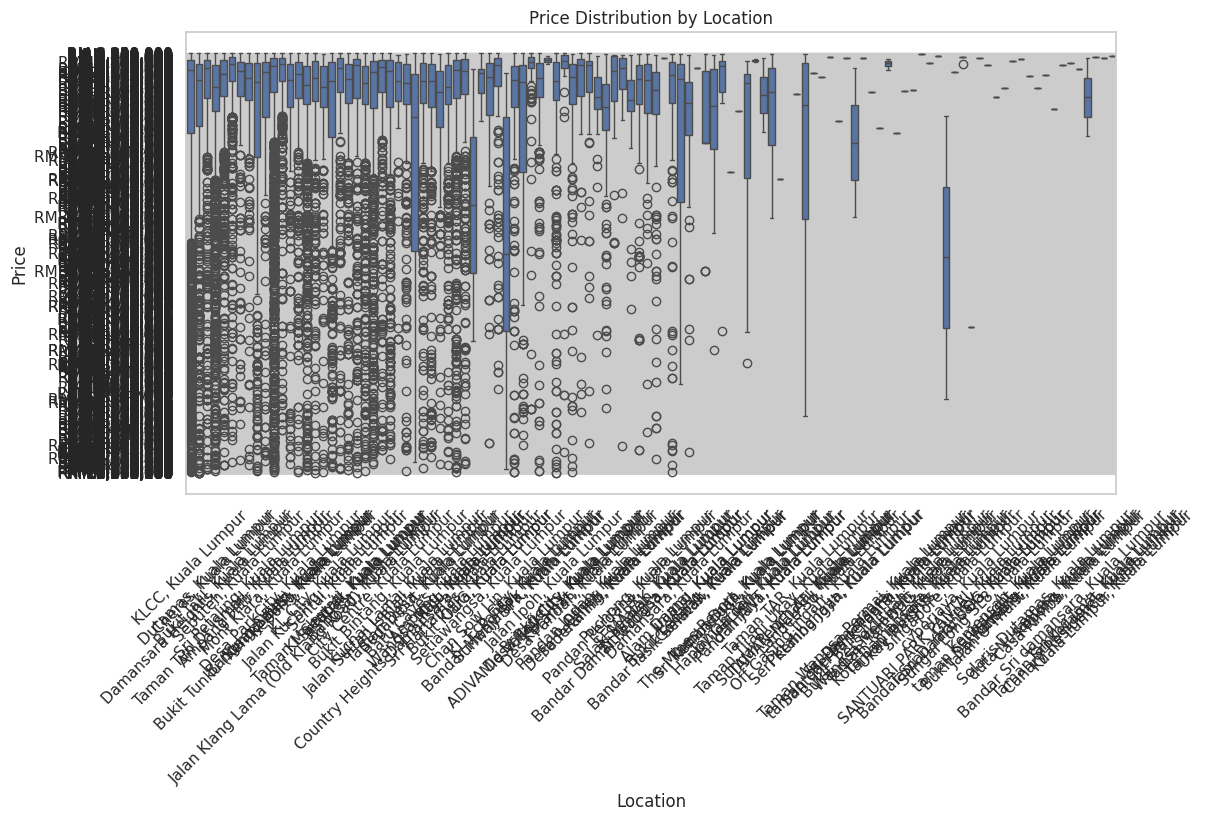

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Price', data=properties)
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

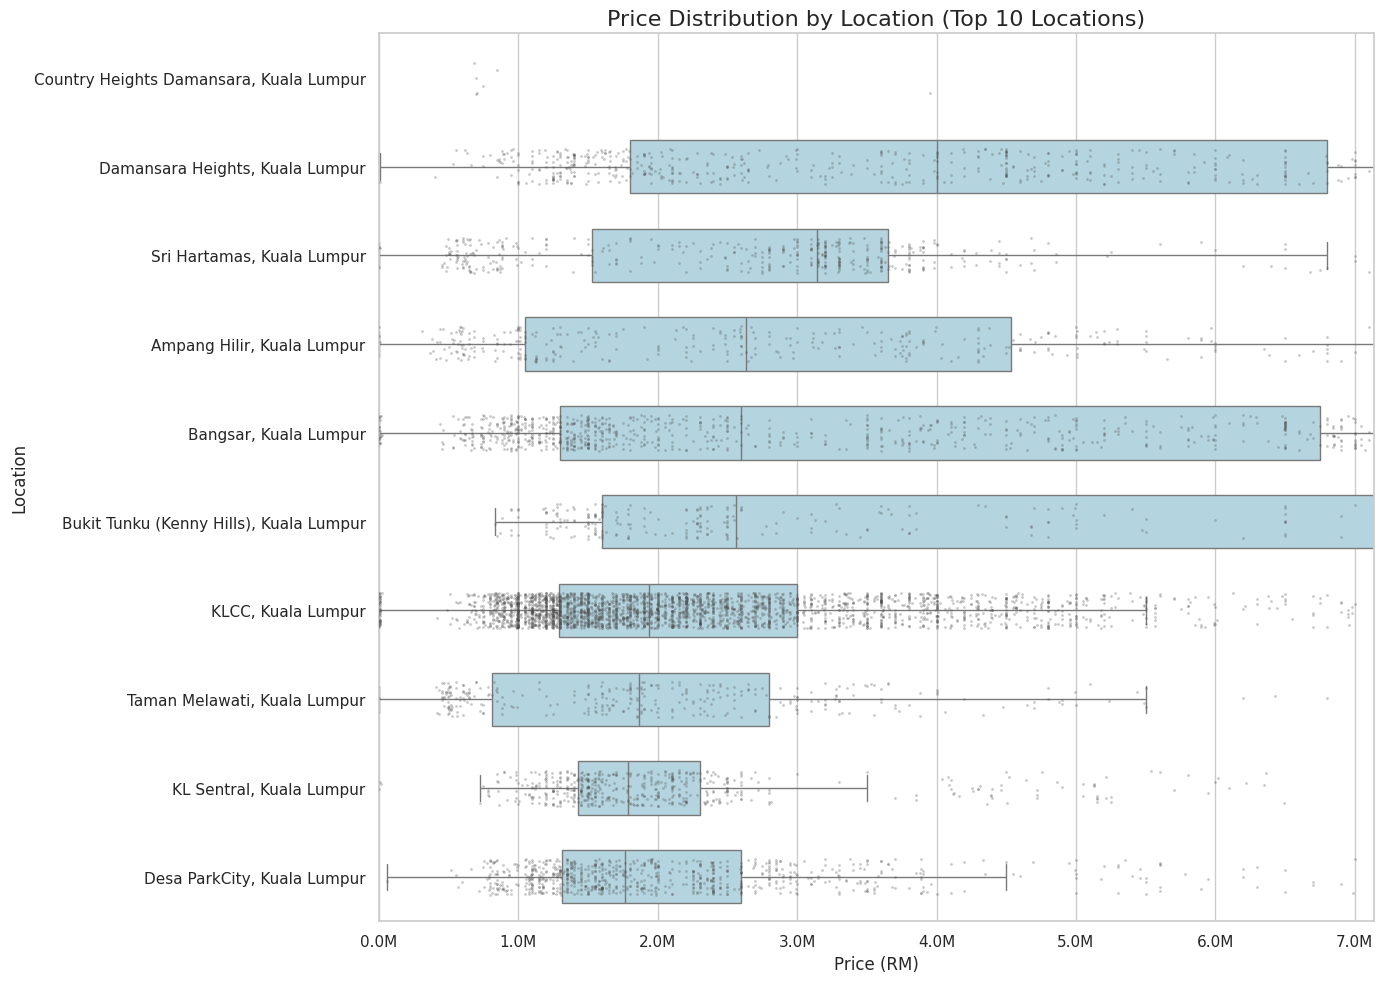

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'properties' is your DataFrame
# Group by location and calculate median price
location_stats = properties.groupby('Location')['Price'].agg(['median', 'count']).reset_index()
location_stats = location_stats.sort_values('median', ascending=False)

# Select top 10 locations by median price with at least 30 data points
top_locations = location_stats[location_stats['count'] >= 30].head(10)['Location'].tolist()

# Filter the original dataframe
properties_filtered = properties[properties['Location'].isin(top_locations)]

# Set up the plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(y='Location', x='Price', data=properties_filtered,
            order=top_locations, width=0.6, color='lightblue', showfliers=False)

# Add a strip plot with jittered points
sns.stripplot(y='Location', x='Price', data=properties_filtered,
              order=top_locations, size=2, color='.3', alpha=0.3, jitter=0.2)

# Customize the plot
plt.title('Price Distribution by Location (Top 10 Locations)', fontsize=16)
plt.xlabel('Price (RM)', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Format x-axis to show currency in millions
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x/1e6:.1f}M'
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

# Set x-axis limit to exclude extreme outliers
q1 = properties_filtered['Price'].quantile(0.25)
q3 = properties_filtered['Price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
plt.xlim(0, min(upper_limit, properties_filtered['Price'].max()))

plt.tight_layout()
plt.show()


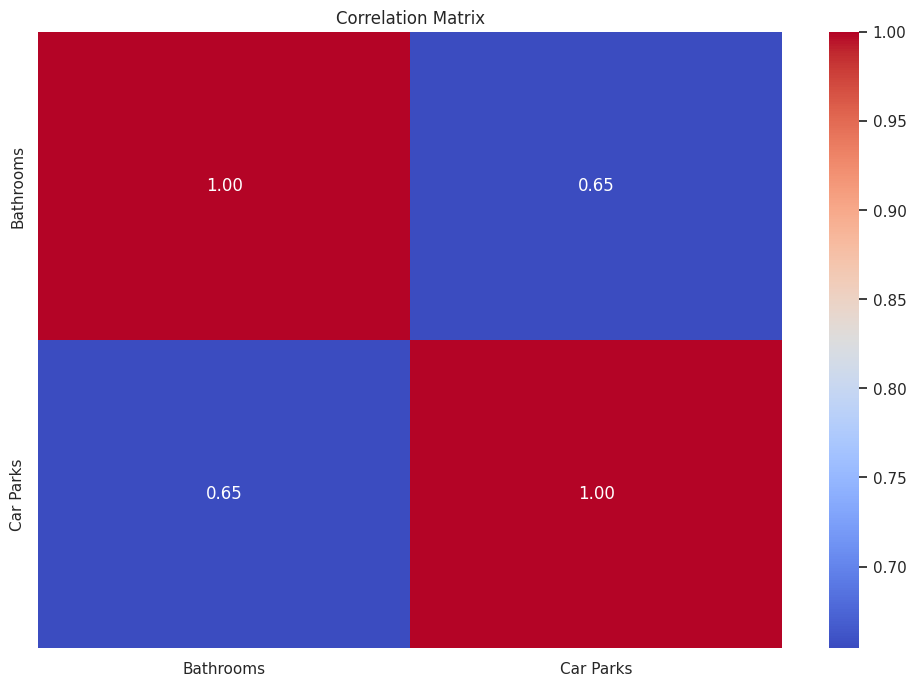

In [ ]:
plt.figure(figsize=(12, 8))
# Remove non-numeric columns before calculating correlation
correlation_matrix = properties.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Analyze Impact of Additional Features
Amenities
Visualize how amenities affect property prices.

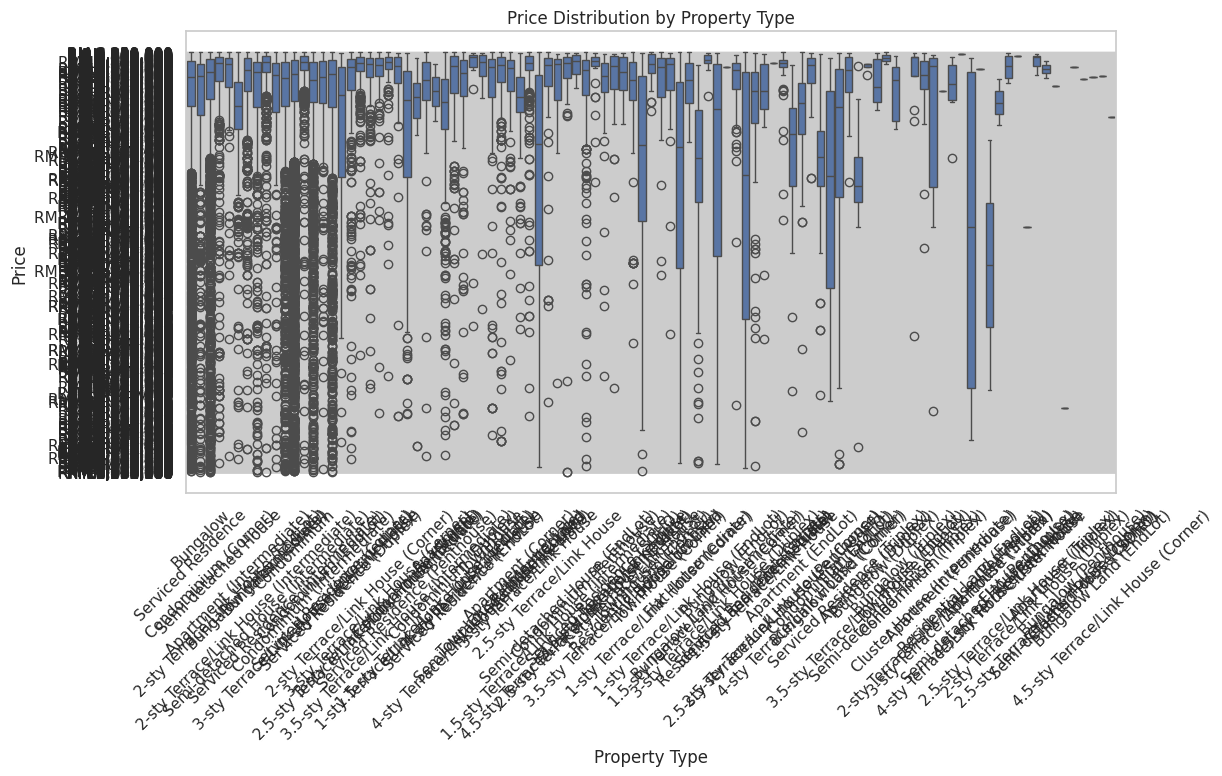

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Price', data=properties)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

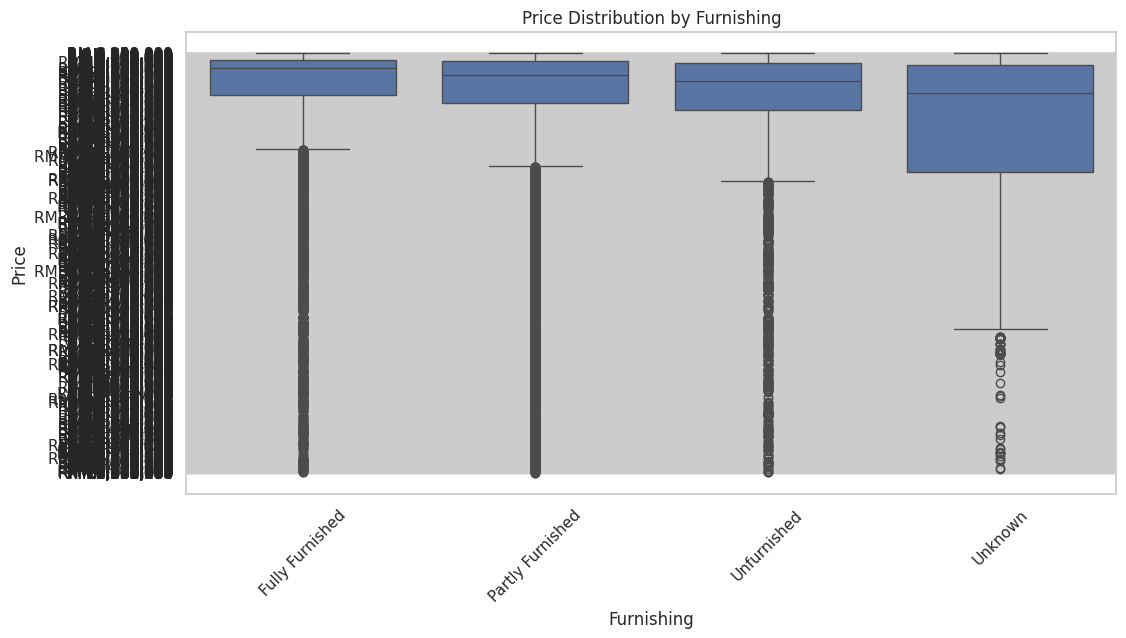

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Furnishing', y='Price', data=properties)
plt.title('Price Distribution by Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['Price', 'Price per Area', 'Price per Room'], dtype='object')
Price             float64
Price per Area    float64
Price per Room    float64
dtype: object


In [ ]:
for col in df.columns:
    print(col)

Price
Price per Area
Price per Room


In [ ]:
print(properties_encoded.info())
print(properties_encoded.head())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 107 entries, Location to Furnishing_Unknown
dtypes: bool(101), float64(3), object(3)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [Location, Price, Rooms, Bathrooms, Car Parks, Size, Property Type_1-sty Terrace/Link House (Corner), Property Type_1-sty Terrace/Link House (EndLot), Property Type_1-sty Terrace/Link House (Intermediate), Property Type_1.5-sty Terrace/Link House, Property Type_1.5-sty Terrace/Link House (Corner), Property Type_1.5-sty Terrace/Link House (EndLot), Property Type_1.5-sty Terrace/Link House (Intermediate), Property Type_2-sty Terrace/Link House, Property Type_2-sty Terrace/Link House (Corner), Property Type_2-sty Terrace/Link House (Duplex), Property Type_2-sty Terrace/Link House (EndLot), Property Type_2-sty Terrace/Link House (Intermediate), Property Type_2-sty Terrace/Link House (Penthouse), Property Type_2.5-sty Terrace/Link House, Property Type_2.5-sty Terrace/Link House (Corner), Pr

In [ ]:
furnishing_column = [col for col in df.columns if 'furnish' in col.lower()]
if furnishing_column:
    print(f"Possible furnishing column: {furnishing_column[0]}")
    print(df[furnishing_column[0]].unique())
else:
    print("No column name contains 'furnish'")

No column name contains 'furnish'


In [ ]:
print(df.head().T)

                   Price  Price per Area  Price per Room
Price           1.000000        0.984988        0.991360
Price per Area  0.984988        1.000000        0.993207
Price per Room  0.991360        0.993207        1.000000


In [ ]:
# Check for missing values in X
print(X.isnull().sum())

Location                                  0
Rooms                                     0
Bathrooms                                 0
Car Parks                                 0
Size                                      0
                                         ..
Property Type_Townhouse (EndLot)          0
Property Type_Townhouse (Intermediate)    0
Furnishing_Partly Furnished               0
Furnishing_Unfurnished                    0
Furnishing_Unknown                        0
Length: 106, dtype: int64


In [ ]:
# Verify the shape of X
print(X.shape)

(0, 106)


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
properties = pd.read_csv('real_estate.csv')

# Clean 'Price' column
properties['Price'] = properties['Price'].replace({'RM ': '', ',': ''}, regex=True).astype(float)

# Handle missing values in 'Price'
properties = properties.dropna(subset=['Price'])

# Clean 'Size' column: Extract numeric values
def extract_numeric(size_str):
    if pd.isnull(size_str):
        return None
    match = re.search(r'\d+', size_str.replace(',', ''))
    return float(match.group()) if match else None

properties['Size'] = properties['Size'].apply(extract_numeric)

# Handle missing values in 'Size'
properties = properties.dropna(subset=['Size'])

# Convert numerical columns to numeric, handling non-numeric values
def convert_to_numeric(column):
    return pd.to_numeric(column, errors='coerce')

# Convert relevant columns to numeric
properties['Rooms'] = convert_to_numeric(properties['Rooms'])
properties['Bathrooms'] = convert_to_numeric(properties['Bathrooms'])
properties['Car Parks'] = convert_to_numeric(properties['Car Parks'])

# Handle missing values in these columns
properties = properties.dropna(subset=['Rooms', 'Bathrooms', 'Car Parks'])

# Encode categorical columns using one-hot encoding
properties_encoded = pd.get_dummies(properties, columns=['Location', 'Property Type', 'Furnishing'], drop_first=True)

# Prepare features and target
X = properties_encoded.drop('Price', axis=1)
y = properties_encoded['Price']

# Check for missing values in X before scaling
print("Missing values in X:", X.isnull().sum())

# Check numerical features
numerical_features = ['Size', 'Rooms', 'Bathrooms', 'Car Parks']
if all(col in X.columns for col in numerical_features):
    # Normalize numerical features
    scaler = StandardScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
else:
    raise ValueError("Expected numerical columns are missing in the DataFrame.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df)



<ipython-input-157-b5ebebde2ea3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['Size'] = properties['Size'].apply(extract_numeric)


Missing values in X: Rooms                                     0
Bathrooms                                 0
Car Parks                                 0
Size                                      0
Location_Ampang, Kuala Lumpur             0
                                         ..
Property Type_Townhouse (EndLot)          0
Property Type_Townhouse (Intermediate)    0
Furnishing_Partly Furnished               0
Furnishing_Unfurnished                    0
Furnishing_Unknown                        0
Length: 163, dtype: int64
                                             Feature    Importance
3                                               Size  4.930157e-01
71                 Location_Taman Duta, Kuala Lumpur  2.014370e-01
138          Property Type_Residential Land (Corner)  6.702437e-02
1                                          Bathrooms  3.803671e-02
2                                          Car Parks  3.771194e-02
..                                               ...           ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB
None

Dataset Shape: (53883, 8)

Column Names: Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')

Summary Statistics:
          Bathrooms     Car Parks
count  51870.000000  36316.000000
mean       3.073434      2.007848
std        1.631079      1.310427
min        1.000000      1.000000
25%        2.000000      1.000

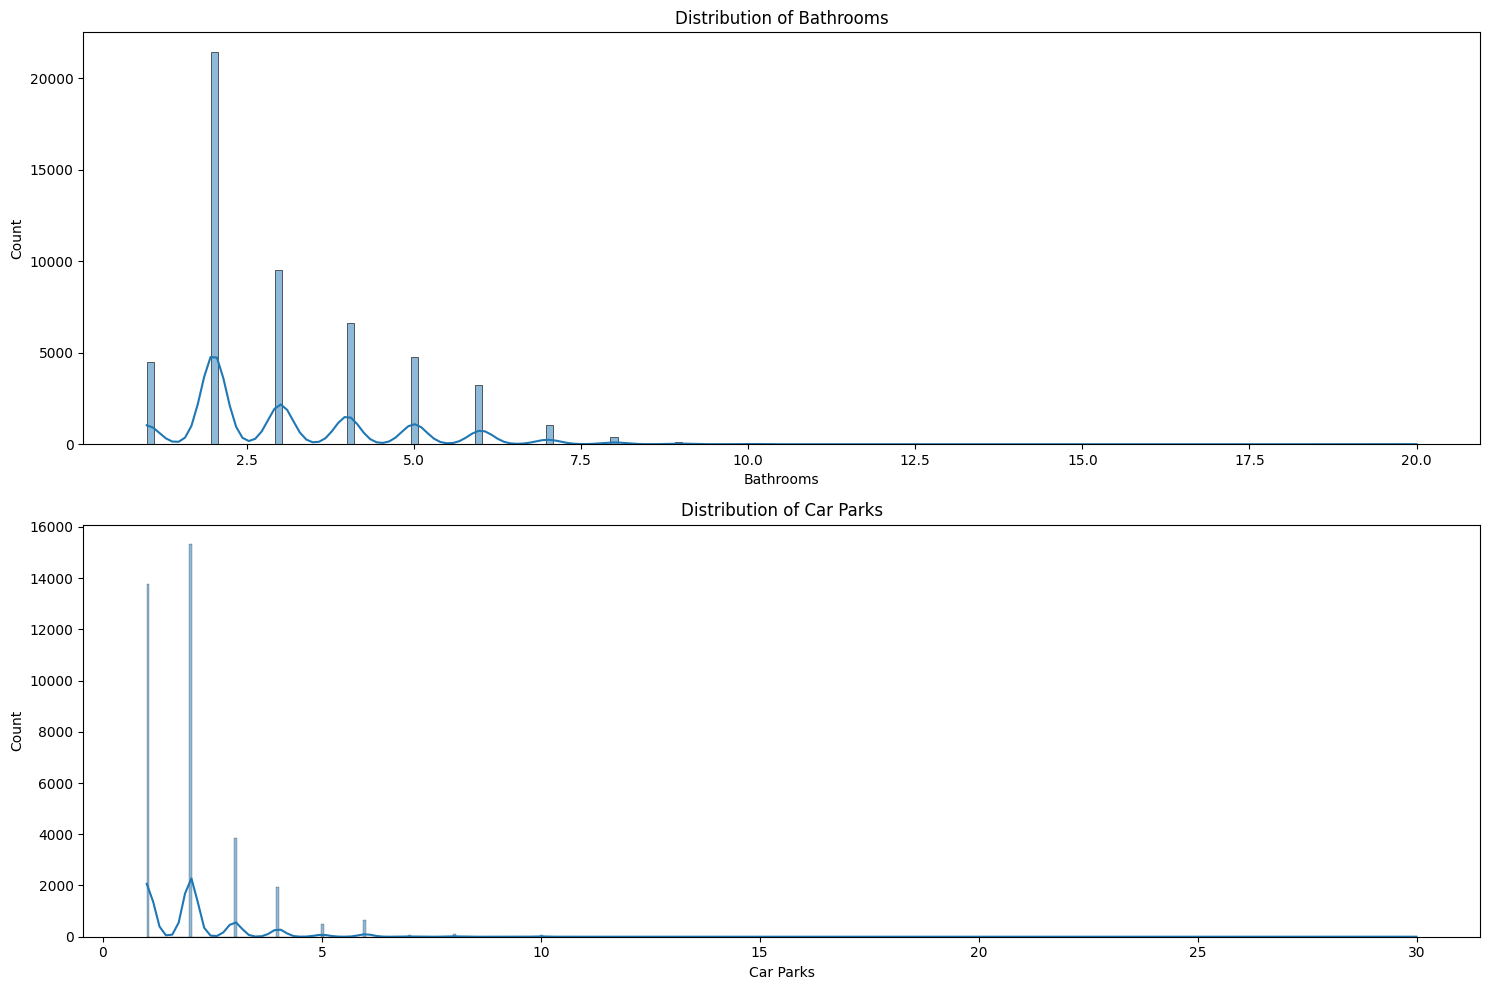

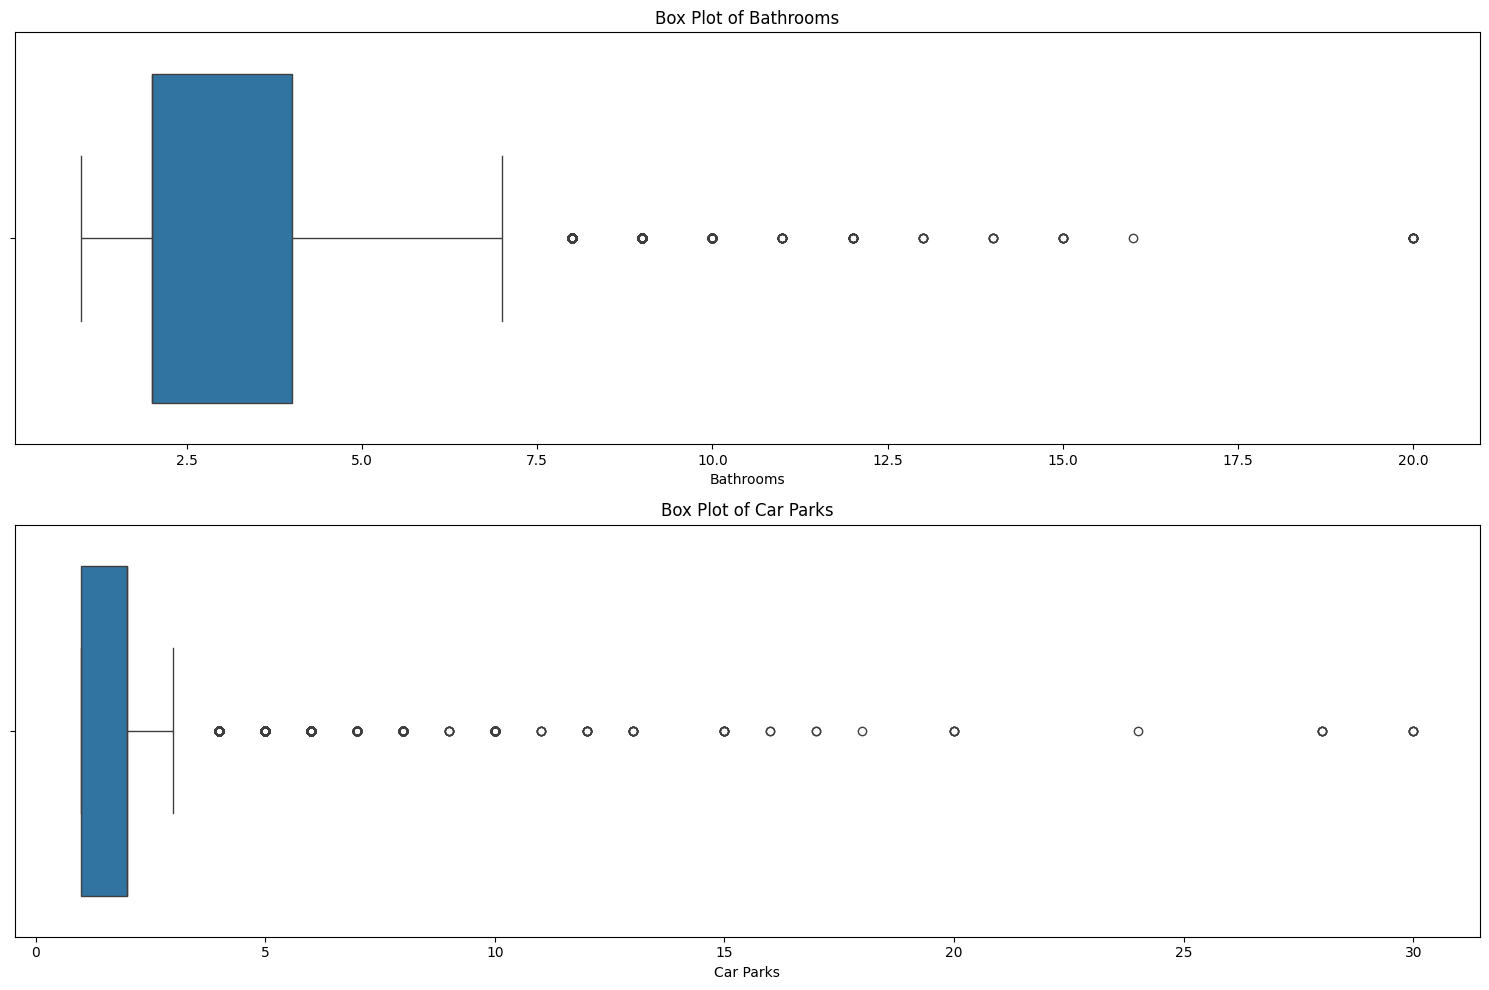

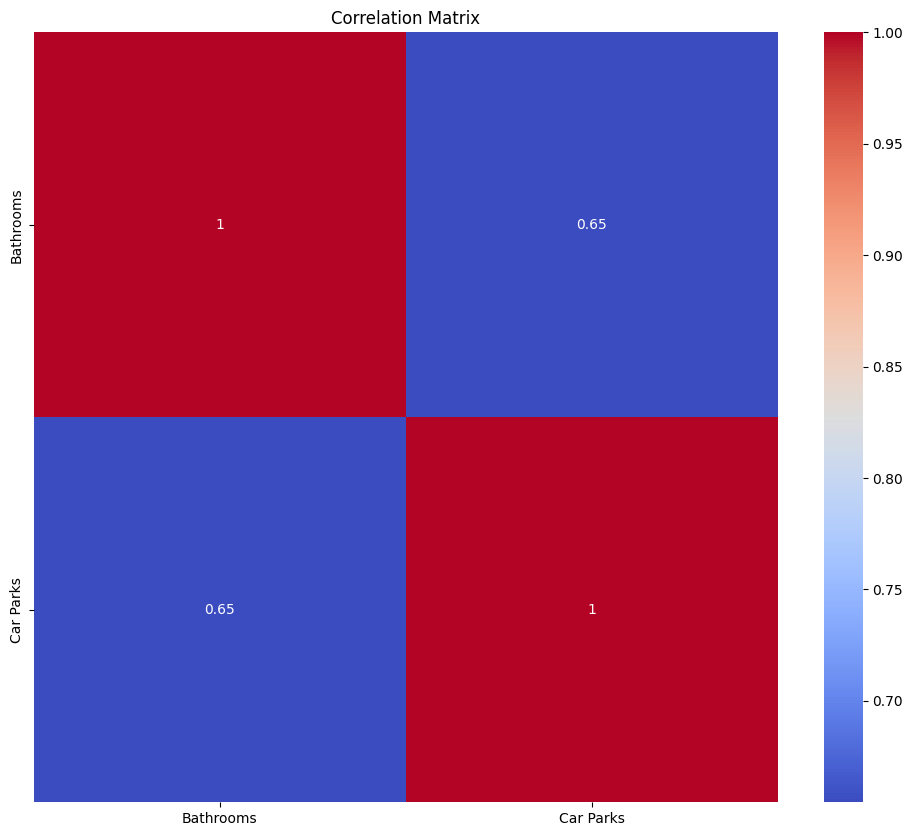

ValueError: Could not interpret value `Built-Up` for `x`. An entry with this name does not appear in `data`.

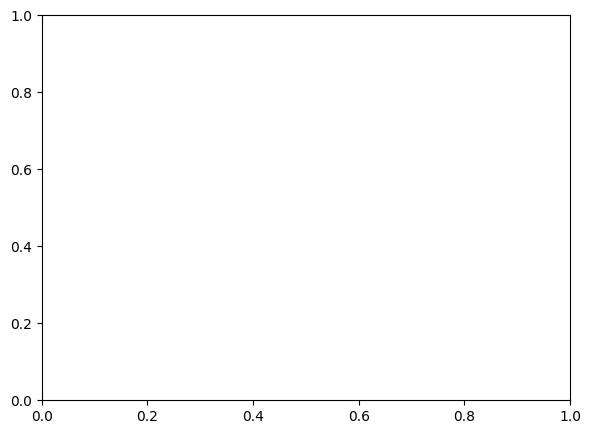

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
# Assuming you have already combined the data from all buildings into a single CSV file
df = pd.read_csv('real_estate.csv')

# 1. Basic Information
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nColumn Names:", df.columns)

# 2. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Data Types
print("\nData Types:")
print(df.dtypes)

# 5. Unique Values in Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# 6. Distribution of Numerical Variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 5 * len(numerical_columns)))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 7. Box Plots for Numerical Variables
plt.figure(figsize=(15, 5 * len(numerical_columns)))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# 8. Correlation Matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 9. Scatter Plots for Key Relationships
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Built-Up', y='Price (RM)', data=df)
plt.title('Price vs Built-Up Area')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Floor', y='Price (RM)', data=df)
plt.title('Price vs Floor')
plt.show()

# 10. Time Series Analysis of Prices
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='Price (RM)', data=df)
plt.title('Price Trends Over Time')
plt.xticks(rotation=45)
plt.show()

# 11. Price per Square Foot Analysis
df['Price_per_sqft'] = df['Price (RM)'] / df['Built-Up']

plt.figure(figsize=(15, 5))
sns.boxplot(x='Building', y='Price_per_sqft', data=df)
plt.title('Price per Square Foot by Building')
plt.xticks(rotation=45)
plt.show()

# 12. Statistical Tests
# Example: T-test for price difference between two buildings
building1 = df[df['Building'] == 'Building1']['Price (RM)']
building2 = df[df['Building'] == 'Building2']['Price (RM)']
t_statistic, p_value = stats.ttest_ind(building1, building2)
print(f"\nT-test for price difference between Building1 and Building2:")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# 13. Feature Engineering (if applicable)
# Example: Create a new feature for age of the property
df['Property_Age'] = (pd.Timestamp.now() - df['Date']).astype('<m8[Y]')

# 14. Outlier Detection
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

price_outliers = detect_outliers(df, 'Price (RM)')
print("\nOutliers in Price:")
print(price_outliers[['Building', 'Price (RM)', 'Built-Up']])

# 15. Summary of Key Findings
print("\nKey Findings:")
print(f"1. Total number of transactions: {len(df)}")
print(f"2. Average price: RM {df['Price (RM)'].mean():.2f}")
print(f"3. Most expensive property: RM {df['Price (RM)'].max():.2f}")
print(f"4. Least expensive property: RM {df['Price (RM)'].min():.2f}")
print(f"5. Most common building: {df['Building'].mode()[0]}")
print(f"6. Correlation between Price and Built-Up Area: {df['Price (RM)'].corr(df['Built-Up']):.2f}")

# Save the cleaned and processed dataset
df.to_csv('processed_buildings_data.csv', index=False)
print("\nProcessed data saved to 'processed_buildings_data.csv'")

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv('real_estate.csv')

# Print column names to see what's available
print("Available columns:", df.columns.tolist())

# Function to check if a column exists
def column_exists(column_name):
    return column_name in df.columns

# 1. Price Distribution
if column_exists('Price (RM)'):
    fig = px.histogram(df, x='Price (RM)', nbins=50, title='Distribution of Property Prices')
    fig.update_xaxes(title='Price (RM)')
    fig.update_yaxes(title='Count')
    fig.show()
else:
    print("'Price (RM)' column not found. Skipping Price Distribution plot.")

# 2. Price vs Built-Up Area Scatter Plot
if column_exists('Price (RM)') and column_exists('Built-Up'):
    fig = px.scatter(df, x='Built-Up', y='Price (RM)',
                     hover_data=df.columns, title='Price vs Built-Up Area')
    fig.update_xaxes(title='Built-Up Area')
    fig.update_yaxes(title='Price (RM)')
    fig.show()
else:
    print("'Price (RM)' or 'Built-Up' column not found. Skipping Price vs Built-Up Area plot.")

# 3. Correlation Heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", title='Correlation Heatmap')
    fig.show()
else:
    print("Not enough numeric columns for correlation heatmap.")

# 4. Box Plot of Prices by Building
if column_exists('Price (RM)') and column_exists('Building'):
    fig = px.box(df, x='Building', y='Price (RM)', title='Price Distribution by Building')
    fig.update_xaxes(title='Building')
    fig.update_yaxes(title='Price (RM)')
    fig.show()
else:
    print("'Price (RM)' or 'Building' column not found. Skipping Box Plot.")

# 5. Floor vs Price Relationship
if column_exists('Floor') and column_exists('Price (RM)'):
    fig = px.scatter(df, x='Floor', y='Price (RM)',
                     title='Floor vs Price Relationship')
    fig.update_xaxes(title='Floor')
    fig.update_yaxes(title='Price (RM)')
    fig.show()
else:
    print("'Floor' or 'Price (RM)' column not found. Skipping Floor vs Price plot.")

# 6. Sunburst Chart for Hierarchical View
if column_exists('Price (RM)') and column_exists('Building') and column_exists('Built-Up'):
    df['Price_Category'] = pd.qcut(df['Price (RM)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
    fig = px.sunburst(df, path=['Building', 'Price_Category'], values='Built-Up',
                      title='Hierarchical View of Buildings and Price Categories')
    fig.show()
else:
    print("Required columns for Sunburst Chart not found. Skipping this visualization.")

# 7. Radar Chart for Building Comparison
if column_exists('Building'):
    metrics = [col for col in ['Price (RM)', 'Built-Up', 'Floor'] if column_exists(col)]
    if len(metrics) > 1:
        building_avg = df.groupby('Building')[metrics].mean()
        building_avg_normalized = (building_avg - building_avg.min()) / (building_avg.max() - building_avg.min())

        fig = go.Figure()
        for building in building_avg_normalized.index:
            fig.add_trace(go.Scatterpolar(
                r=building_avg_normalized.loc[building].values,
                theta=metrics,
                fill='toself',
                name=building
            ))
        fig.update_layout(
            polar=dict(radialaxis=dict(visible=True)),
            showlegend=True,
            title='Building Comparison: Key Metrics'
        )
        fig.show()
    else:
        print("Not enough metrics for Radar Chart. Skipping this visualization.")
else:
    print("'Building' column not found. Skipping Radar Chart.")

print("Visualization process completed.")

Available columns: ['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type', 'Size', 'Furnishing']
'Price (RM)' column not found. Skipping Price Distribution plot.
'Price (RM)' or 'Built-Up' column not found. Skipping Price vs Built-Up Area plot.


'Price (RM)' or 'Building' column not found. Skipping Box Plot.
'Floor' or 'Price (RM)' column not found. Skipping Floor vs Price plot.
Required columns for Sunburst Chart not found. Skipping this visualization.
'Building' column not found. Skipping Radar Chart.
Visualization process completed.


Columns in the dataset: Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')
Numeric features: ['Bathrooms', 'Car Parks']
Categorical features: ['Location', 'Rooms', 'Property Type', 'Size', 'Furnishing']


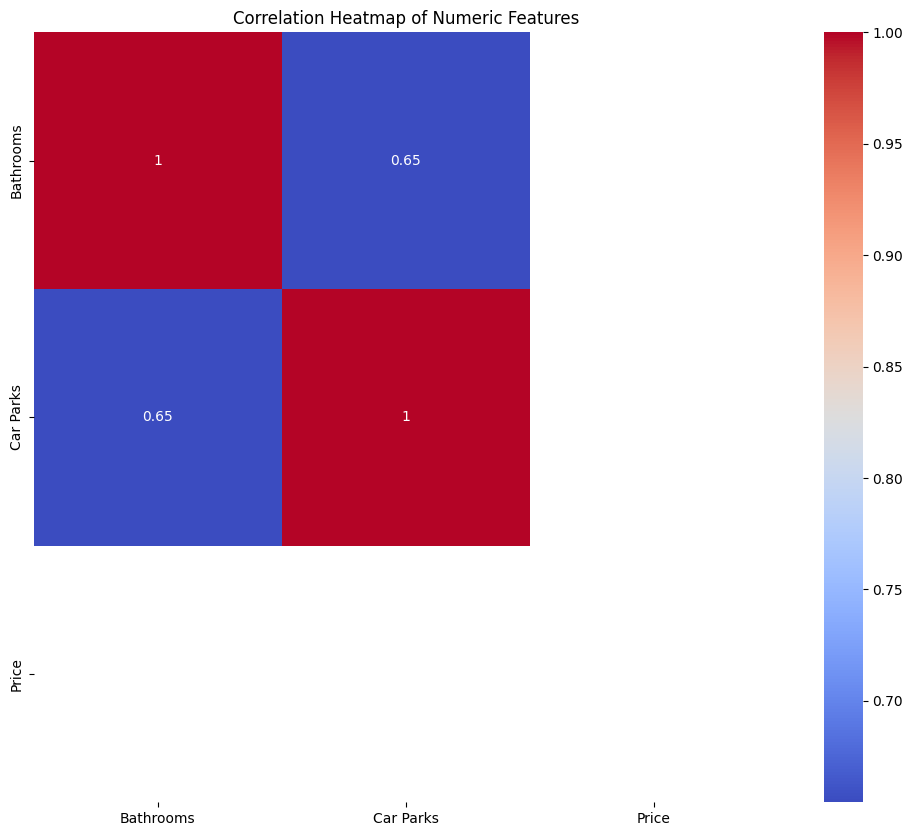

ValueError: Input y contains NaN.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objects as go

# Load the data
df = pd.read_csv('real_estate.csv')

print("Columns in the dataset:", df.columns)

# 1. Data Preprocessing
# Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Ensure 'Price' is treated as numeric
if 'Price' in categorical_features:
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    categorical_features.remove('Price')
    numeric_features.append('Price')

# Remove 'Price' from features list as it's our target variable
if 'Price' in numeric_features:
    numeric_features.remove('Price')

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 2. Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_features + ['Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 3. Feature Importance using Random Forest
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)

feature_importance = rf_pipeline.named_steps['regressor'].feature_importances_
feature_names = (rf_pipeline.named_steps['preprocessor']
                 .named_transformers_['num'].get_feature_names_out(numeric_features).tolist() +
                 rf_pipeline.named_steps['preprocessor']
                 .named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

# 4. Linear Regression Analysis
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 5. Statistical Tests for Categorical Features
for cat_feature in categorical_features:
    print(f"\nAnalysis for {cat_feature}:")
    grouped = df.groupby(cat_feature)['Price'].mean().sort_values(ascending=False)
    print(grouped)

    # ANOVA test
    cat_groups = [group for _, group in df.groupby(cat_feature)['Price']]
    f_statistic, p_value = sm.stats.f_oneway(*cat_groups)
    print(f"ANOVA test - F-statistic: {f_statistic}, p-value: {p_value}")

# 6. Visualization of Key Relationships
# Price vs. Numeric Features
for feature in numeric_features:
    fig = px.scatter(df, x=feature, y='Price', title=f'Price vs {feature}')
    fig.show()

# Box plots for Categorical Features
for feature in categorical_features:
    fig = px.box(df, x=feature, y='Price', title=f'Price Distribution by {feature}')
    fig.show()

print("Analysis completed.")

Identify Patterns or Factors Influencing Prices
Pair Plots
Examine relationships between different features and the target variable.

# Machine Learning Model Development

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
properties = pd.read_csv('real_estate.csv')

# Clean 'Price' column
properties['Price'] = properties['Price'].replace({'RM ': '', ',': ''}, regex=True).astype(float)

# Clean 'Size' column: Extract numeric values
def extract_numeric(size_str):
    if pd.isnull(size_str):
        return None
    match = re.search(r'\d+', size_str.replace(',', ''))
    return float(match.group()) if match else None

properties['Size'] = properties['Size'].apply(extract_numeric)

# Handle missing values
properties = properties.dropna(subset=['Price', 'Size'])
properties['Rooms'] = pd.to_numeric(properties['Rooms'], errors='coerce')
properties['Bathrooms'] = pd.to_numeric(properties['Bathrooms'], errors='coerce')
properties['Car Parks'] = pd.to_numeric(properties['Car Parks'], errors='coerce')
properties = properties.dropna(subset=['Rooms', 'Bathrooms', 'Car Parks'])

# Encode categorical columns
properties_encoded = pd.get_dummies(properties, columns=['Location', 'Property Type', 'Furnishing'], drop_first=True)

# Prepare features and target
X = properties_encoded.drop('Price', axis=1)
y = properties_encoded['Price']

# Normalize numerical features
numerical_features = ['Size', 'Rooms', 'Bathrooms', 'Car Parks']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                           RMSE           MAE     R-squared
Linear Regression  8.380612e+15  1.301820e+14 -3.742347e+19
Random Forest      6.375761e+05  1.700673e+05  7.834009e-01
Gradient Boosting  6.954896e+05  2.894133e+05  7.422647e-01


Data Cleaning: Cleans and preprocesses the data, ensuring all columns used for modeling are numeric.
Feature Encoding: Uses one-hot encoding to convert categorical variables into numerical format.
Normalization: Scales numerical features to have a mean of 0 and a standard deviation of 1.
Model Training: Trains three different regression models: Linear Regression, Random Forest, and Gradient Boosting.
Evaluation: Evaluates the models using RMSE, MAE, and R-squared metrics and displays the results.
This approach will help you assess and compare the performance of different models and choose the best one for your prediction task. If you have any questions or need further adjustments, feel free to ask!

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('real_estate.csv')

print("Columns in the dataset:", df.columns)

# Convert columns to numeric where appropriate
numeric_columns = ['Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Size']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Ensure 'Price' is treated as the target variable
if 'Price' in numeric_features:
    numeric_features.remove('Price')

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Impute missing values in the target variable (Price)
df['Price'] = df['Price'].fillna(df['Price'].median())

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'CV R2': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }

    print(f"\n{name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print(f"Cross-validation R2 Score: {cv_scores.mean()} (+/- {cv_scores.std() * 2})")

    # Feature Importance (for Random Forest and Gradient Boosting)
    if hasattr(model, 'feature_importances_'):
        feature_importance = pipeline.named_steps['regressor'].feature_importances_
        feature_names = (pipeline.named_steps['preprocessor']
                         .named_transformers_['num'].get_feature_names_out(numeric_features).tolist() +
                         pipeline.named_steps['preprocessor']
                         .named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())

        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
        plt.title(f'Top 15 Most Important Features - {name}')
        plt.tight_layout()
        plt.show()

    # Scatter plot of predicted vs actual prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Actual vs Predicted Prices - {name}')
    plt.tight_layout()
    plt.show()

# Compare model performances
performance_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(performance_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))
performance_df[['R2', 'CV R2']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Model development and evaluation completed.")


Columns in the dataset: Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')
Numeric features: ['Rooms', 'Bathrooms', 'Car Parks', 'Size']
Categorical features: ['Location', 'Property Type', 'Furnishing']

Missing values in each column:
Location             0
Price            53883
Rooms            23317
Bathrooms         2013
Car Parks        17567
Property Type       25
Size             53883
Furnishing        6930
dtype: int64
Training set shape: (43106, 7)
Testing set shape: (10777, 7)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning:

Skipping features without any observed values: ['Size']. At least one non-missing value is needed for imputation with strategy='median'.



ValueError: Input y contains NaN.

In [43]:
# Inspect the DataFrame to see the columns
print(df.columns)


Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')


In [44]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()


In [45]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()


# Model Interpretation and Decision Making

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load and preprocess the dataset
properties = pd.read_csv('real_estate.csv')

# Clean 'Price' column
properties['Price'] = properties['Price'].replace({'RM ': '', ',': ''}, regex=True).astype(float)

# Clean 'Size' column: Extract numeric values
def extract_numeric(size_str):
    if pd.isnull(size_str):
        return None
    match = re.search(r'\d+', size_str.replace(',', ''))
    return float(match.group()) if match else None

properties['Size'] = properties['Size'].apply(extract_numeric)

# Convert columns to string for safe processing
properties['Rooms'] = properties['Rooms'].astype(str)
properties['Bathrooms'] = properties['Bathrooms'].astype(str)
properties['Car Parks'] = properties['Car Parks'].astype(str)

# Convert to numeric, handle non-numeric values
def convert_to_numeric(column):
    return pd.to_numeric(column.str.extract('(\d+)', expand=False), errors='coerce')

properties['Rooms'] = convert_to_numeric(properties['Rooms'])
properties['Bathrooms'] = convert_to_numeric(properties['Bathrooms'])
properties['Car Parks'] = convert_to_numeric(properties['Car Parks'])

# Handle missing values
properties = properties.dropna(subset=['Price', 'Size', 'Rooms', 'Bathrooms', 'Car Parks'])

# Encode categorical columns
properties_encoded = pd.get_dummies(properties, columns=['Location', 'Property Type', 'Furnishing'], drop_first=True)

# Prepare features and target
X = properties_encoded.drop('Price', axis=1)
y = properties_encoded['Price']

# Normalize numerical features
numerical_features = ['Size', 'Rooms', 'Bathrooms', 'Car Parks']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Feature Importances
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Predict prices for a selection of properties
# Sample properties from the original dataset
sample_properties = properties.sample(n=5, random_state=42)

# Preprocess the sample data
sample_properties_encoded = pd.get_dummies(sample_properties, columns=['Location', 'Property Type', 'Furnishing'], drop_first=True)
sample_properties_encoded = sample_properties_encoded.reindex(columns=X.columns, fill_value=0)  # Ensure same columns

# Check for non-numeric values
sample_properties_encoded = sample_properties_encoded.apply(pd.to_numeric, errors='coerce')
sample_properties_encoded = sample_properties_encoded.fillna(0)  # Handle any NaNs if present

# Predict prices
predicted_prices = best_model.predict(sample_properties_encoded)
sample_properties['Predicted Price'] = predicted_prices
print("Sample Properties with Predicted Prices:")
print(sample_properties[['Location', 'Price', 'Predicted Price']])

# Recommendations and Model Limitations
print("\nRecommended Building for Best Value for Money:")
recommended_building = sample_properties.groupby('Location')['Predicted Price'].mean().idxmax()
print(f"Recommended Building: {recommended_building}")

print("\nModel Limitations and Improvements:")
print("1. The model may be limited by the features used and the quality of data.")
print("2. Features like 'Location' might have limited granularity and could benefit from more detailed encoding.")
print("3. Data preprocessing steps should be verified for consistency.")
print("4. Consider experimenting with other models or ensemble methods.")
print("5. Incorporate external data such as market trends or economic indicators for better predictions.")


Feature Importances:
                                               Feature  Importance
3                                                 Size    0.312259
176                        Furnishing_Partly Furnished    0.232374
2                                            Car Parks    0.191429
1                                            Bathrooms    0.061902
152            Property Type_Residential Land (Corner)    0.046579
..                                                 ...         ...
58                Location_Petaling Jaya, Kuala Lumpur    0.000000
78                    Location_Taman TAR, Kuala Lumpur    0.000000
97   Property Type_2-sty Terrace/Link House (Pentho...    0.000000
32                       Location_Gurney, Kuala Lumpur    0.000000
48                               Location_Kuala Lumpur    0.000000

[179 rows x 2 columns]
Sample Properties with Predicted Prices:
                              Location      Price  Predicted Price
37537  Damansara Heights, Kuala Lumpur  174

# Conclusion

It can be inferred that almost none of the studied models, including the linear regression model and the neural network model, are good at predicting the property prices. This is rather expected especially because properties are more than what the features captured here suggest. Specifically, the summary statistics observed during the EDA federal indicate that the neighborhood alone contributes to gigantic disparities in property values. The other variables employed here for example the size of property or number of rooms cannot explain all variability with in. An accurate price prediction model for new properties should, therefore, need a more fine-grained set of features extracted than just the property feed page as obtained here but the properties individual listing page.